<h1><center>                        Telecom Churn Case Study  </center></h1>



### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid")
pd.options.display.float_format = '{:,.2f}'.format
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,classification_report, confusion_matrix,f1_score,hinge_loss,log_loss,precision_recall_fscore_support,roc_auc_score
from sklearn.model_selection import GridSearchCV,KFold,train_test_split
from sklearn.pipeline import Pipeline

<h1> Business Problem </h1>

<h2> Description </h2>

Customer churn is the loss of clients or customers.

 

Telephone service companies use Customer churn analysis as the key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. 

 

Because it costs a lot more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

<p style='font-size:18px'><b> Problem Statement </b></p>

We have to create a model to predict the churn customer and second model to find the best params effecting churn.

<h2> Real World / Business Objectives and Constraints </h2>

1. Model to predict the churn and identification of important columns for churn.
2. Incorrect prediction will be costly for the business. 
3. No strict latency constraints.

<h1> Machine Learning problem </h1>

<h3> Data Overview </h3>

<br>
All of the data is in 2 files: Train and Data dictionary<br />
<pre>
<b>Train.csv</b> contains 226 columns: CIRCLE_ID,Incoming calls,Outgoing calls,Special calls, ISD calls, Mobile internet 
usage volume etc.<br />
<b>DataDictionary.csv</b> contains the definition of the columns in the file Train.csv<br />
<b>Size of Train.csv</b> - 75.4MB<br />
<b>Size of DataDictionary.csv</b> - 1.45KB<br />
<b>Number of rows in Train.csv</b> = 99999<br />
</pre>

The dataset contains customer-level information for a span of four consecutive months - June, July, August and September.
The data is related to the Services availed by the users and its minutes of usages.<br />
<br />

__Data Field Explaination__

Dataset contains 99999 rows. A few of the important columns in the dataset are:<br />
<pre>
<b>total_ic_mou_(6/7/8)</b> - Total Incoming minutes of Usage<br />
<b>total_og_mou_(6/7/8)</b> - Total Incoming minutes of Usage<br />
<b>vol_2g_mb_(6/7/8)</b> - Mobile internet usage volume 2g<br />
<b>vol_3g_mb_(6/7/8)</b> - Mobile internet usage volume 3g<br />
<b>Suffix in the column names</b> - The attributes containing 6, 7, 8, 9 as suffixes imply that those correspond to the months June, July, August and September respectively.)<br />
</pre>

<br />

<h2>Mapping the real-world problem to a Machine Learning Problem </h2>

<h3>  Type of Machine Learning Problem </h3>


<p> It is a binary classification problem  <br>
<b>Binary Classification</b>: Binary or binomial classification is the task of classifying the elements of a given set into two groups (predicting which group each one belongs to) on the basis of a classification rule. <br />
    
This can be thought as: <br /> a Medical testing to determine if a patient has certain disease or not – the classification property is the presence of the disease. <br />
A "pass or fail" test method <br />
__Credit__: https://en.wikipedia.org/wiki/Binary_classification
</p>

<h3> Performance metric </h3>

<b>Accuracy and precision: </b>: 
The FPrecision is a description of random errors, a measure of statistical variability. < br />

A description of systematic errors, a measure of statistical bias; as these cause a difference between a result and a "true" value.

<b>Sensitivity or True Positive Rate (Recall): </b><br>
is the proportion of people that tested positive and are positive (True Positive, TP) of all the people that actually are positive (Condition Positive, CP = TP + FN).
<br>

<b>Specificity (SPC) or True Negative Rate: </b><br>
is the proportion of people that tested negative and are negative (True Negative, TN) of all the people that actually are negative (Condition Negative, CN = TN + FP).
<br>

<b> Area Under Curve(AUC): </b> <br>


AUC - ROC curve is a performance measurement for classification problem at various thresholds settings. ROC is a probability curve and AUC represents degree or measure of separability. It tells how much model is capable of distinguishing between classes.

LOG LOSS - Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label.

<br>
https://en.wikipedia.org/wiki/Evaluation_of_binary_classifiers <br>
https://en.wikipedia.org/wiki/Accuracy_and_precision <br>

In [2]:
# Setup Display to use the full width of the screen to easily see the long statments code
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import warnings
warnings.filterwarnings('ignore')

<h1> Getting Ready </h1>

#### Lets load our input dataset

In [3]:
churn_data = pd.read_csv("telecom_churn_data.csv",encoding='iso-8859-1')

In [4]:
churn_data.head(3)

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.38,...,0,1.00,1.00,1.00,nan,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.05,...,0,nan,1.00,1.00,nan,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.00,0.00,0.00,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.69,...,0,nan,nan,nan,1.00,1103,0.00,0.00,4.17,0.00


In [5]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [6]:
churn_data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,"99,999.00","99,999.00","98,981.00","98,981.00","98,981.00","99,999.00","99,999.00","99,999.00","99,999.00","96,062.00",...,"99,999.00","25,153.00","25,571.00","26,339.00","25,922.00","99,999.00","99,999.00","99,999.00","99,999.00","99,999.00"
mean,"7,001,207,270.39",109.00,0.00,0.00,0.00,282.99,278.54,279.15,261.65,132.40,...,0.08,0.91,0.91,0.89,0.86,"1,219.85",68.17,66.84,60.02,3.30
std,"695,669.39",0.00,0.00,0.00,0.00,328.44,338.16,344.47,342.00,297.21,...,0.65,0.28,0.29,0.31,0.35,954.73,267.58,271.20,253.94,32.41
min,"7,000,000,074.00",109.00,0.00,0.00,0.00,"-2,258.71","-2,014.05",-945.81,"-1,899.51",0.00,...,0.00,0.00,0.00,0.00,0.00,180.00,0.00,0.00,0.00,0.00
25%,"7,000,606,232.50",109.00,0.00,0.00,0.00,93.41,86.98,84.13,62.69,7.38,...,0.00,1.00,1.00,1.00,1.00,467.00,0.00,0.00,0.00,0.00
50%,"7,001,204,632.00",109.00,0.00,0.00,0.00,197.70,191.64,192.08,176.85,34.31,...,0.00,1.00,1.00,1.00,1.00,863.00,0.00,0.00,0.00,0.00
75%,"7,001,812,030.50",109.00,0.00,0.00,0.00,371.06,365.34,369.37,353.47,118.74,...,0.00,1.00,1.00,1.00,1.00,"1,807.50",0.00,0.00,0.00,0.00
max,"7,002,410,905.00",109.00,0.00,0.00,0.00,"27,731.09","35,145.83","33,543.62","38,805.62","7,376.71",...,49.00,1.00,1.00,1.00,1.00,"4,337.00","12,916.22","9,165.60","11,166.21","2,618.57"


In [7]:
# Checking dimention of data
churn_data.shape

(99999, 226)

Let's calculate the total amount recharged in the good phase to derive the high value customers.

In [8]:
churn_data['total_rech_amt_good_phase']  = np.average(churn_data[['total_rech_amt_6','total_rech_amt_7']],axis=1)
churn_data['total_rech_amt_good_phase'].describe()

count   99,999.00
mean       325.24
std        370.83
min          0.00
25%        115.00
50%        229.00
75%        419.00
max     37,762.50
Name: total_rech_amt_good_phase, dtype: float64

Since there is a huge difference in 75th Percentile and Max, there are some outliers. We will remove few outliers @ 6 sigma. We will check the plot as well before and after removal of outliers

Number of records dropped @ 6 Sigma ==>  168


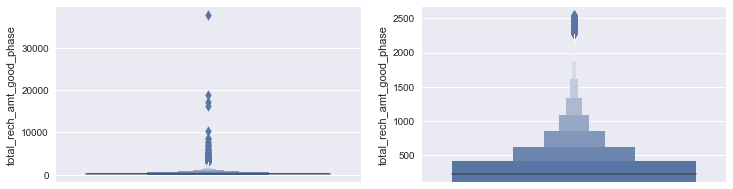

In [9]:
churn_data_3Q = churn_data[np.abs(churn_data.total_rech_amt_good_phase-churn_data.total_rech_amt_good_phase.mean()) <= (6*churn_data.total_rech_amt_good_phase.std())]
print("Number of records dropped @ 6 Sigma ==> ",churn_data.shape[0]-churn_data_3Q.shape[0])

plt.subplots(figsize=(10,3))
plt.tight_layout()

plt.subplot(121)
g = sns.lvplot(y="total_rech_amt_good_phase", data=churn_data, )

plt.subplot(122)
g = sns.lvplot(y="total_rech_amt_good_phase", data=churn_data_3Q,)

Now we will identify the 70th percentile and filter the high value customers form the data.

In [10]:
churn_data_3Q['total_rech_amt_good_phase'].describe(percentiles=[.70])
#      70%        368.500000

count   99,831.00
mean       318.99
std        307.66
min          0.00
50%        228.00
70%        367.00
max      2,550.00
Name: total_rech_amt_good_phase, dtype: float64

In [11]:
churn_data = churn_data_3Q[churn_data['total_rech_amt_good_phase']  >= 367.0]


In [12]:
churn_data.shape

(29984, 227)

Hurray!! <b>We got 29.9k records</b> as was asked <br>
<br>
Now lets clean up the data finding and replacing missing values.

We will clean up the derived columns that we created to remove the ouliers. A similar column will be created later while working derived features.

In [13]:
churn_data.drop('total_rech_amt_good_phase', axis=1, inplace=True)

In [14]:
churn_data.to_csv('churn_data.csv')

In [15]:
# Check for duplicate columns in the dataset
len(churn_data[churn_data.duplicated()])

0

In [16]:
# this function is to determine the columns that have only one unique value.
def get_columns_with_unique_values(dataFrame):
    columns_with_unique_values = []
    for column in dataFrame.columns:
        if (dataFrame[column].nunique() == 1):
            columns_with_unique_values.append(column)
    print ("Columns with unique values " + str(columns_with_unique_values))
    return columns_with_unique_values

In [17]:
columns_with_unique_values = get_columns_with_unique_values(churn_data)

Columns with unique values ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9']


Columns with only one unique value do not contribute to the prediction.
We will drop the columns that have one unique value. This value could also be Zero. Anyway all zeroes in the columns will also not add any value. 

In [18]:
# Dropping the columns that have unique value and, therefore, do not contribute to the analytics.
churn_data=churn_data.drop(columns=columns_with_unique_values, axis=1)

In [19]:
churn_data.shape

(29984, 210)

#### Tagging customers with the Churn Flag.

Tag churners and remove attributes of the churn phase. <br> Tag the churned customers (churn=1, else 0) based on the fourth month data. <br> Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. <br> The attributes we used to tag churners are: <br> <br>
1- total_ic_mou_9 <br>
2- total_og_mou_9 <br>
3- vol_2g_mb_9 <br>
4- vol_3g_mb_9

In [20]:
churn_data['churn']=np.where(((churn_data.total_ic_mou_9 == 0) & (churn_data.total_og_mou_9 == 0) & (churn_data.vol_2g_mb_9 == 0) & ( churn_data.vol_3g_mb_9 == 0)),1,0)

In [21]:
# Total number churns calculation
total_churn = churn_data.churn.sum()
print(total_churn)
# % churns calculation
percentage_of_churn = (total_churn / len(churn_data)) * 100
print(percentage_of_churn)

2589
8.634605122732124


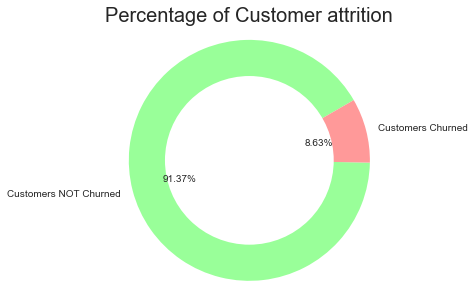

In [22]:
# create data
labels=churn_data["churn"].value_counts().keys().tolist()
labels = ["Customers Churned" if x==1 else "Customers NOT Churned" for x in labels]
sizes=churn_data["churn"].value_counts().values.tolist()
#colors
colors = ['#99ff99','#ff9999',]#,,'#ffcc99']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.2f%%', startangle=30)
#draw circle
centre_circle = plt.Circle((0,0),0.7,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.title("Percentage of Customer attrition", fontsize=20)
plt.show()

As we see in above calculation and plot, we have a total of 8.63% cutomers churning. And that amounts to a total of 2589 churns.

In [23]:
# removing all the attributes corresponding to the churn phase(all attributes having ‘ _9’, etc. in their names).
churn_data = churn_data[churn_data.columns.drop(list(churn_data.filter(like='_9', axis=1)))]

In [24]:
churn_data.shape

(29984, 160)

In [25]:
#drop columns with more than 2/3 null values
churn_data.dropna(thresh=len(churn_data)*0.33,axis=1, inplace=True)

In [26]:
churn_data.shape

(29984, 160)

In [27]:
((churn_data.isnull() | churn_data.isna()).sum() * 100 / churn_data.index.size).round(2)

mobile_number       0.00
arpu_6              0.00
arpu_7              0.00
arpu_8              0.00
onnet_mou_6         1.05
onnet_mou_7         1.01
onnet_mou_8         3.15
offnet_mou_6        1.05
offnet_mou_7        1.01
offnet_mou_8        3.15
roam_ic_mou_6       1.05
roam_ic_mou_7       1.01
roam_ic_mou_8       3.15
roam_og_mou_6       1.05
roam_og_mou_7       1.01
roam_og_mou_8       3.15
loc_og_t2t_mou_6    1.05
loc_og_t2t_mou_7    1.01
loc_og_t2t_mou_8    3.15
loc_og_t2m_mou_6    1.05
loc_og_t2m_mou_7    1.01
loc_og_t2m_mou_8    3.15
loc_og_t2f_mou_6    1.05
loc_og_t2f_mou_7    1.01
loc_og_t2f_mou_8    3.15
loc_og_t2c_mou_6    1.05
loc_og_t2c_mou_7    1.01
loc_og_t2c_mou_8    3.15
loc_og_mou_6        1.05
loc_og_mou_7        1.01
                    ... 
arpu_3g_6          62.13
arpu_3g_7          61.20
arpu_3g_8          60.89
arpu_2g_6          62.13
arpu_2g_7          61.20
arpu_2g_8          60.89
night_pck_user_6   62.13
night_pck_user_7   61.20
night_pck_user_8   60.89


Now we have only few of the null values in the dataframe

In [28]:
# checking if there are any values where total_rech_data is NA and value is present for av_rech_amt_data and vice versa
# checking how many av_rech_amt_data_6 is NA

is_invalid_data_6 = churn_data['av_rech_amt_data_6'] == np.nan
is_invalid_data_7 = churn_data['av_rech_amt_data_7'] == np.nan
is_invalid_data_8 = churn_data['av_rech_amt_data_7'] == np.nan

# checking if any value is present for these rows for total_rech_data

print(churn_data.loc[is_invalid_data_6,'total_rech_data_6'].sum())
print(churn_data.loc[is_invalid_data_7,'total_rech_data_7'].sum())
print(churn_data.loc[is_invalid_data_8,'total_rech_data_8'].sum())

# checking how many total_rech_data_6 is NA

is_invalid_data_6 = churn_data['total_rech_data_6'] == np.nan 
is_invalid_data_7 = churn_data['total_rech_data_7'] == np.nan 
is_invalid_data_8 = churn_data['total_rech_data_8'] == np.nan 

# checking if any value is present for these rows for av_rech_amt_data_6

print(churn_data.loc[is_invalid_data_6,'av_rech_amt_data_6'].sum())
print(churn_data.loc[is_invalid_data_7,'av_rech_amt_data_7'].sum())
print(churn_data.loc[is_invalid_data_8,'av_rech_amt_data_8'].sum())

0.0
0.0
0.0
0.0
0.0
0.0


Thankfully, no invalid data in this case. We will go with assumption that missing data means customer have not recharged. So we will impute with value 0. Before doing so, we will handle the date columns in the dataset.

In the dataset, we have 3 catogories of Date variable. First one is the last date of the month which will be constant through out the column. So we can safely ingnore the column. The other two are last date of recharge and last date of data recharge. Since we already have number of times recharged in each month that gives the frequency of recharges. There is also a column for totat recharge amount in each month. Since these two data elements are already available we can safely ingnore the other two date columns also. So, let us exclude the date columnsfrom our dataframe. <br>


In [29]:
churn_data = churn_data[churn_data.columns.drop(list(churn_data.filter(like='date', axis=1)))]
churn_data.shape

(29984, 154)

We can drop **arpu** columns because they are revenue related columns and as given in problem statement we have to perform USAGE churn based policy.

In [30]:
churn_data = churn_data[churn_data.columns.drop(list(churn_data.filter(like='arpu', axis=1)))]
churn_data.shape

(29984, 145)

In [31]:
churn_data.fillna(0,inplace=True)
churn_data.shape

(29984, 145)

In [32]:
# list(churn_data.filter(like='acti', axis=1))
# len(list(churn_data.filter(like='_6', axis=1)))+len(list(churn_data.filter(like='_7', axis=1)))+len(list(churn_data.filter(like='_8', axis=1)))

In [33]:
churn_data.columns[~churn_data.columns.str.contains('_6|_7|_8')]

Index(['mobile_number', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g', 'churn'],
      dtype='object')

In [34]:
churn_data = churn_data.rename(columns={'jun_vbc_3g':'vbc_3g_6', 'jul_vbc_3g':'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8'})
churn_data.drop('sep_vbc_3g', axis=1, inplace=True)

# EDA

#### Derive additional columns

We will derive some additinol columns that will help in our analysis and model building. For doing this we will create an additional set of columns for the average of good phase. then we will rename all the August columns to action phase so that these 2 sets of data elements can be used in our further analysis.

In [35]:
jun_df = churn_data.loc[:,churn_data.columns[churn_data.columns.str.contains('_6')]]
jul_df = churn_data.loc[:,churn_data.columns[churn_data.columns.str.contains('_7')]]

jun_df.columns = [x[:-1] for x in churn_data.columns[churn_data.columns.str.contains('_6')].tolist()]
jul_df.columns = [x[:-1] for x in churn_data.columns[churn_data.columns.str.contains('_7')].tolist()]

churn_data_good_phase = (jun_df+jul_df)/2
churn_data_good_phase.columns = [x[:-1] + 'good_phase' for x in churn_data.columns[churn_data.columns.str.contains('_6')].tolist()]
churn_data = pd.concat([churn_data, churn_data_good_phase], axis=1)

churn_data.shape

(29984, 191)

In [36]:
churn_data.columns=churn_data.columns.str.replace("_8","_action_phase")

Now that we have a clean and full dataset, we will try to find the correlation of different columns with Churn Flag. Then we will take some highly correlated columns and try obseve them more closely to look for inferences.

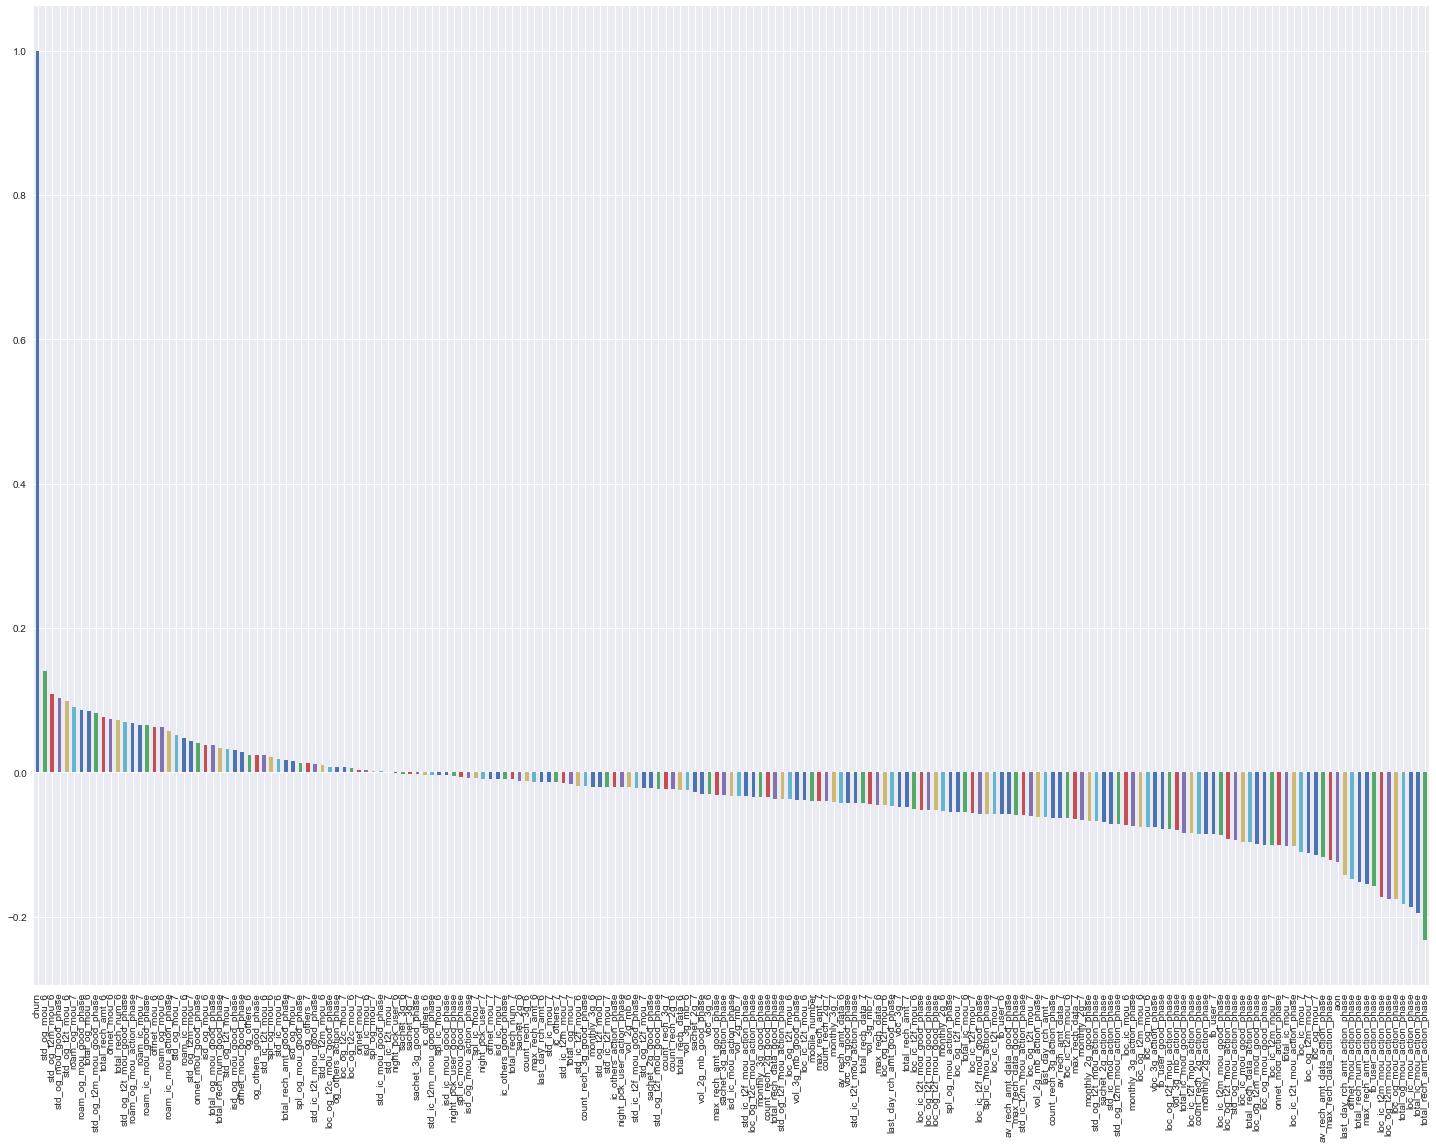

In [37]:
#Get Correlation of "Churn" with other variables:

plt.figure(figsize=(25,18))
churn_data.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

Since the first 4 features and the last 3 features are highly correlated, lets try to plot this in a pair plot to understand the relationship between these columns.

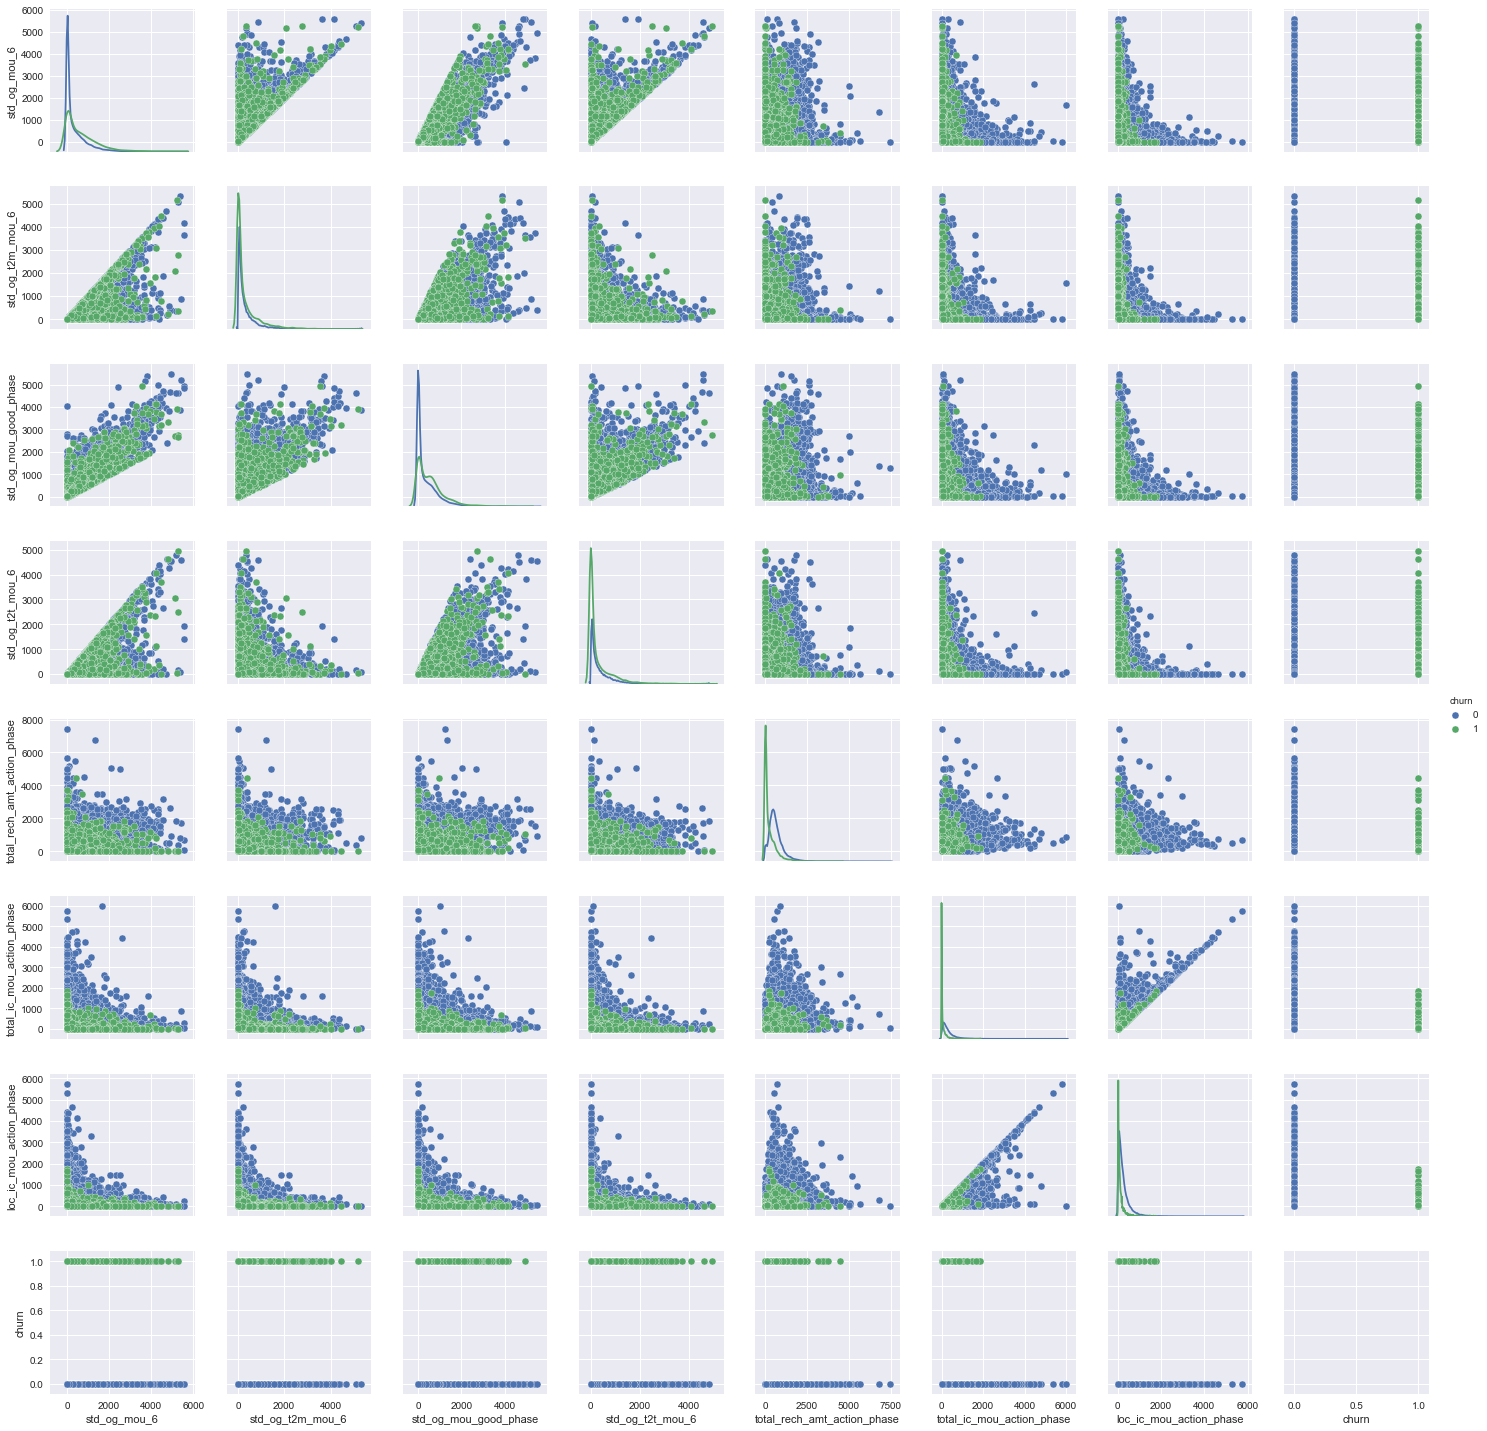

In [38]:
# 'roam_og_mou_8','roam_og_mou_7','total_og_mou_8', 'max_rech_amt_8', 'total_rech_num_8', 

sns.pairplot(data=churn_data[['std_og_mou_6', 'std_og_t2m_mou_6','std_og_mou_good_phase', 'std_og_t2t_mou_6',
                              'total_rech_amt_action_phase', 'total_ic_mou_action_phase', 'loc_ic_mou_action_phase', 'churn']],hue='churn',diag_kind='kde')#, kind = 'reg')

The plot above can be interpreted in two catogaries majorly. First dimension is on STD Outgoing calls and the other is Incoming calls. Wherever the customers are having high volume of incoming calls, cutomers are happy and not churning out. Many of the customers churning out are having lower volume of incoming calls. On the other hand there are lot of customers churning out with the STD usage across all bands of usage. Customers making outgoing STD calls to same mobile operators are churning out more than the customers making outgoing STD calls to other mobile operators. 

### Analyse the features by catogories

For doing this we will create a function to graphically represent the choosen variable to aid in the analyses. Then we will proceed to analysis.

In [39]:
# creating function to anlyze the features across 6th, 7th and 8th month

def analyze_feature(feature_start):
    plt.rcParams["figure.figsize"] = [20,5]
    fig = plt.figure()
    cols = {c: feature_start + "_" + str(c) for c in [6,7,'good_phase','action_phase']}
    frame_data = []
    [frame_data.append({
        "mean_6": churn_data[churn_data["churn"] == churn][cols[6]].mean(),
        "mean_7": churn_data[churn_data["churn"] == churn][cols[7]].mean(),
        "mean_good": churn_data[churn_data["churn"] == churn][cols['good_phase']].mean(),
        "mean_action": churn_data[churn_data["churn"] == churn][cols['action_phase']].mean(),
        "std_6": churn_data[churn_data["churn"] == churn][cols[6]].std(),
        "std_7": churn_data[churn_data["churn"] == churn][cols[7]].std(),
        "std_good": churn_data[churn_data["churn"] == churn][cols['good_phase']].std(),
        "std_action": churn_data[churn_data["churn"] == churn][cols['action_phase']].std()
    }) for churn in [0,1]]
    
    f,axes = plt.subplots(nrows=1, ncols=4)
    sns.lvplot(data=churn_data, y=feature_start + "_6", x="churn",
                hue="churn", ax=axes[0], scale='linear' )
    axes[0].set_title('June')
    
    sns.lvplot(data=churn_data, y=feature_start + "_7",  x="churn",
                hue="churn", ax=axes[1], scale='linear' )
    axes[1].set_title('July')
    sns.lvplot(data=churn_data, y=feature_start + "_good_phase",  x="churn",
                hue="churn", ax=axes[2], scale='linear' )
    axes[2].set_title('Good Phase')
    sns.lvplot(data=churn_data, y=feature_start + "_action_phase",  x="churn",
                hue="churn", ax=axes[3], scale='linear' )
    axes[3].set_title('Action Phase')
    return pd.DataFrame(frame_data,index={"Non Churned","Churned"}).round(2)

Now we will look at the all the columns that are available in the dataset and try to analyse some of them.

In [40]:
churn_data.columns[churn_data.columns.str.contains('good')]

Index(['onnet_mou_good_phase', 'offnet_mou_good_phase',
       'roam_ic_mou_good_phase', 'roam_og_mou_good_phase',
       'loc_og_t2t_mou_good_phase', 'loc_og_t2m_mou_good_phase',
       'loc_og_t2f_mou_good_phase', 'loc_og_t2c_mou_good_phase',
       'loc_og_mou_good_phase', 'std_og_t2t_mou_good_phase',
       'std_og_t2m_mou_good_phase', 'std_og_t2f_mou_good_phase',
       'std_og_mou_good_phase', 'isd_og_mou_good_phase',
       'spl_og_mou_good_phase', 'og_others_good_phase',
       'total_og_mou_good_phase', 'loc_ic_t2t_mou_good_phase',
       'loc_ic_t2m_mou_good_phase', 'loc_ic_t2f_mou_good_phase',
       'loc_ic_mou_good_phase', 'std_ic_t2t_mou_good_phase',
       'std_ic_t2m_mou_good_phase', 'std_ic_t2f_mou_good_phase',
       'std_ic_mou_good_phase', 'total_ic_mou_good_phase',
       'spl_ic_mou_good_phase', 'isd_ic_mou_good_phase',
       'ic_others_good_phase', 'total_rech_num_good_phase',
       'total_rech_amt_good_phase', 'max_rech_amt_good_phase',
       'last_day_rch_am

We will try to analyse Local Incoming/Outgoing, STD Incoming/Outgoing and Roaming Incoming/Outgoing and try to indentify any patterns in the Customer Churn.


### Local Calls

Lets take out all column names related to Local Calls


In [41]:
local_calls_columns =  churn_data.columns[churn_data.columns.str.contains('loc')]

local_calls_columns

Index(['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_action_phase',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_action_phase',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_action_phase',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_action_phase',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_action_phase',
       'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_action_phase',
       'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_action_phase',
       'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_action_phase',
       'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_action_phase',
       'loc_og_t2t_mou_good_phase', 'loc_og_t2m_mou_good_phase',
       'loc_og_t2f_mou_good_phase', 'loc_og_t2c_mou_good_phase',
       'loc_og_mou_good_phase', 'loc_ic_t2t_mou_good_phase',
       'loc_ic_t2m_mou_good_phase', 'loc_ic_t2f_mou_good_phase',
       'loc_ic_mou_good_phase'],
      dtype='object')

#### Local Outgoing Calls

,mean_6,mean_7,mean_action,mean_good,std_6,std_7,std_action,std_good
Churned,289.50,295.17,278.83,292.33,379.59,378.77,371.35,359.77
Non Churned,188.47,142.98,51.58,165.73,325.47,263.86,141.62,262.83


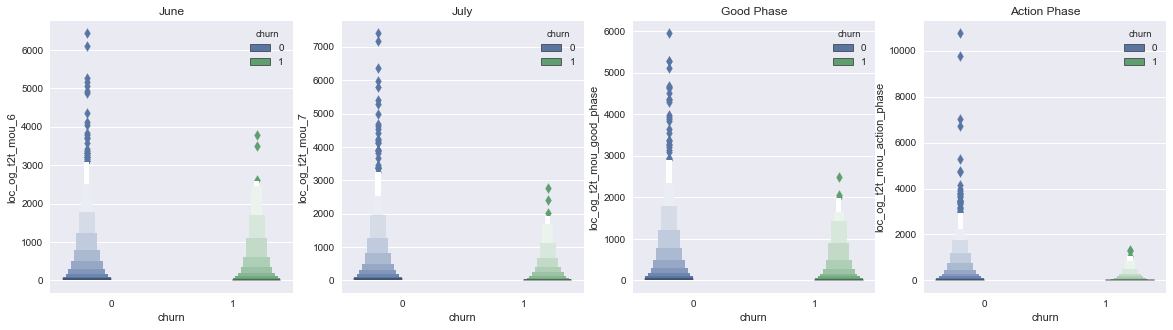

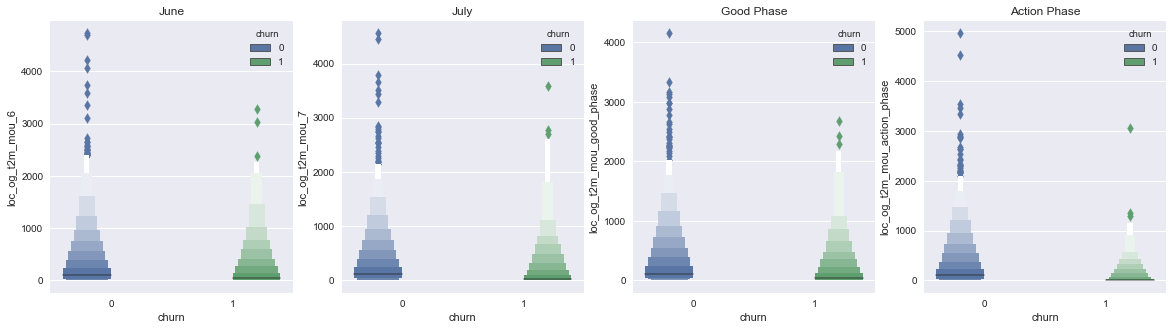

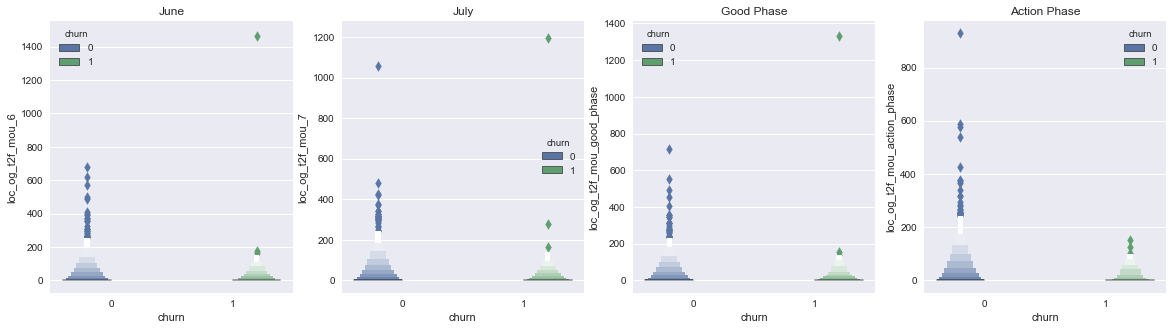

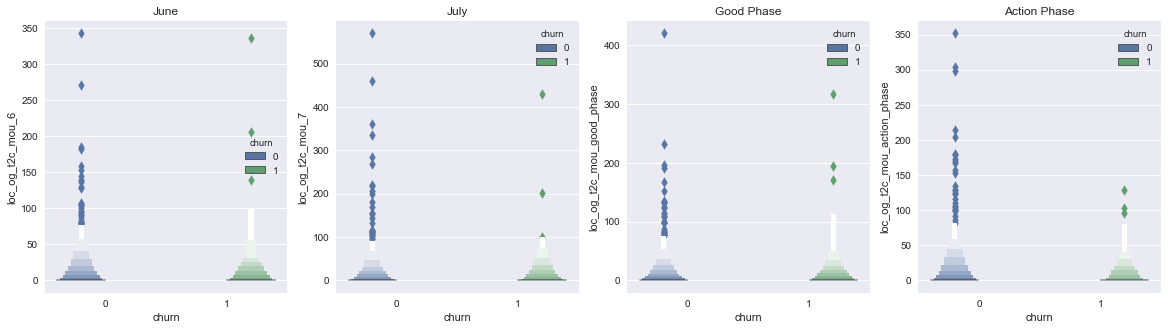

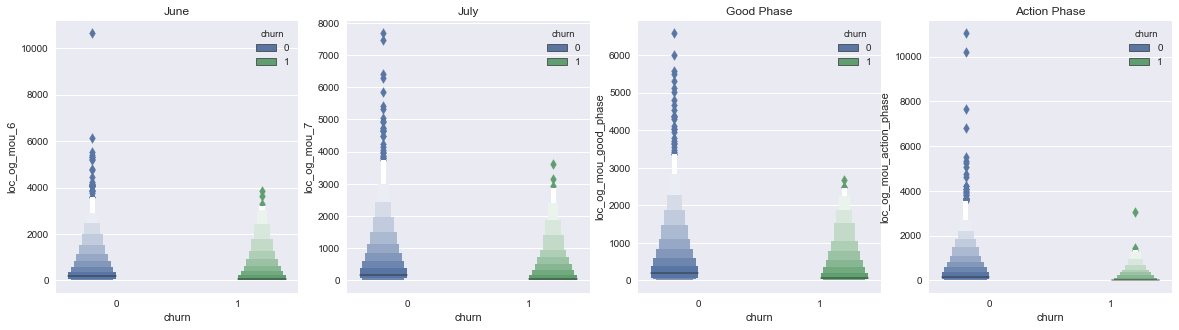

In [42]:
analyze_feature('loc_og_t2t_mou')
analyze_feature('loc_og_t2m_mou')
analyze_feature('loc_og_t2f_mou')
analyze_feature('loc_og_t2c_mou')
analyze_feature('loc_og_mou')


* Local Outgoing calls are significantly decreased during Action Phase for the customers who are churning out.
* Local Outgoing calls do not have any changing trend during all the months for the churning customerns. So this is not playing any role in the decession. 
* There is a decresing trend in Local Out going calls to mobiles and during action phase they are very low. Cutomers are not happy about outgoing mobile calls

#### Local Incoming Calls

,mean_6,mean_7,mean_action,mean_good,std_6,std_7,std_action,std_good
Churned,249.86,257.08,250.68,253.47,312.06,317.19,311.95,300.66
Non Churned,169.59,134.27,47.95,151.93,297.90,253.21,120.00,244.33


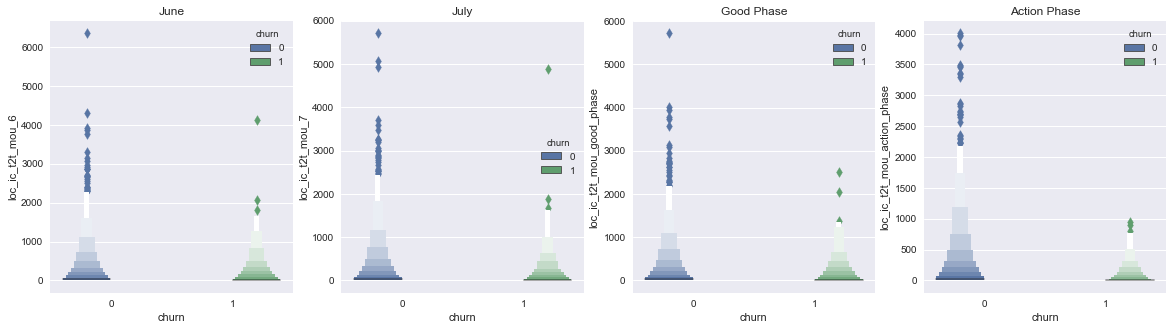

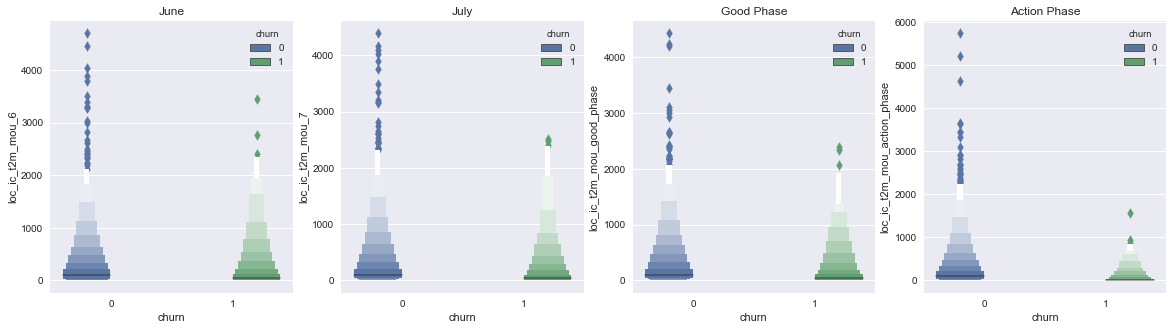

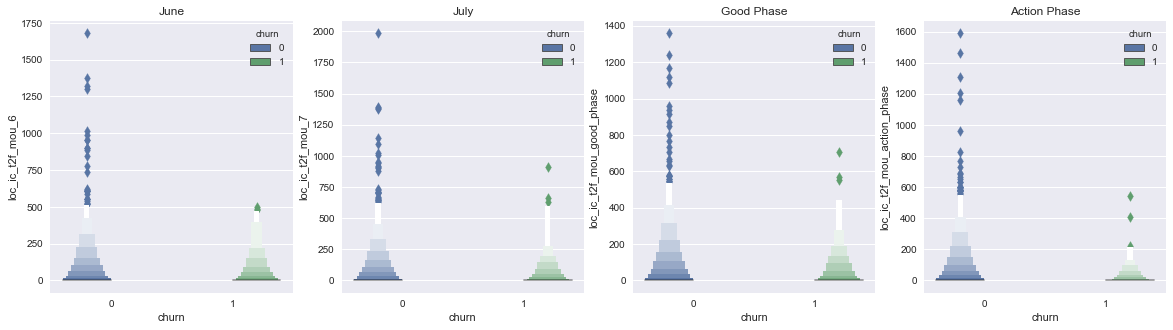

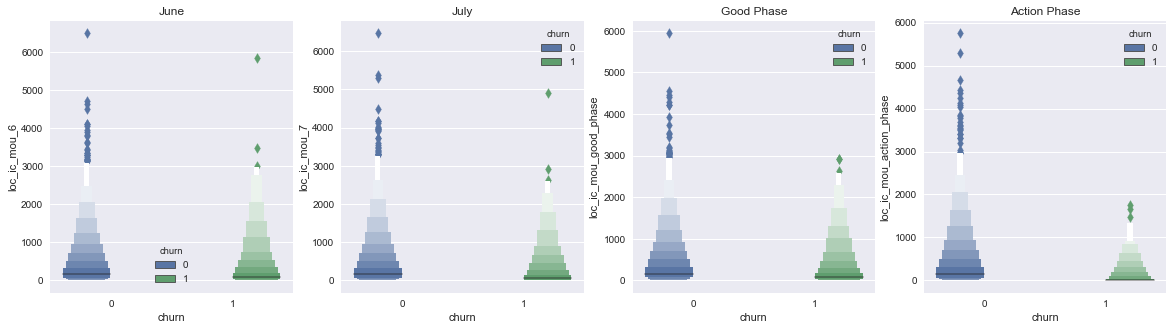

In [43]:
analyze_feature('loc_ic_t2t_mou')
analyze_feature('loc_ic_t2m_mou')
analyze_feature('loc_ic_t2f_mou')
analyze_feature('loc_ic_mou')

* Customers who are having less incoming calls are churning out more.
* Higher the incoming calls the chances of the churning out is less.

### STD Calls

Lets take out all column names related to STD Calls


In [44]:
std_calls_columns =  churn_data.columns[churn_data.columns.str.contains('std')]

std_calls_columns

Index(['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_action_phase',
       'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_action_phase',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_action_phase',
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_action_phase',
       'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_action_phase',
       'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_action_phase',
       'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_action_phase',
       'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_action_phase',
       'std_og_t2t_mou_good_phase', 'std_og_t2m_mou_good_phase',
       'std_og_t2f_mou_good_phase', 'std_og_mou_good_phase',
       'std_ic_t2t_mou_good_phase', 'std_ic_t2m_mou_good_phase',
       'std_ic_t2f_mou_good_phase', 'std_ic_mou_good_phase'],
      dtype='object')

#### STD Outgoing Calls

,mean_6,mean_7,mean_action,mean_good,std_6,std_7,std_action,std_good
Churned,364.26,400.42,366.66,382.34,556.14,604.82,608.21,538.15
Non Churned,655.74,513.09,166.45,584.41,768.55,700.93,407.79,644.98


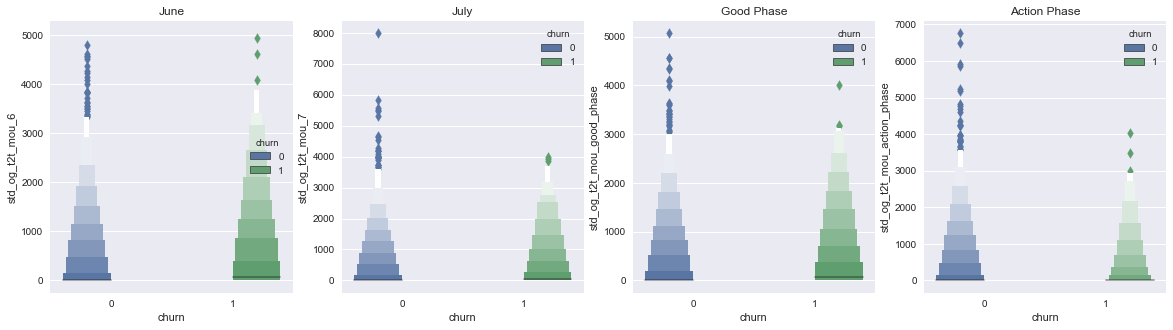

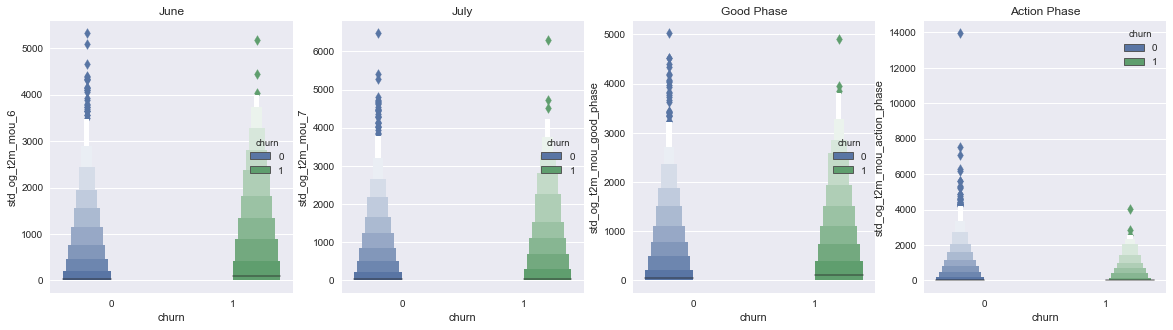

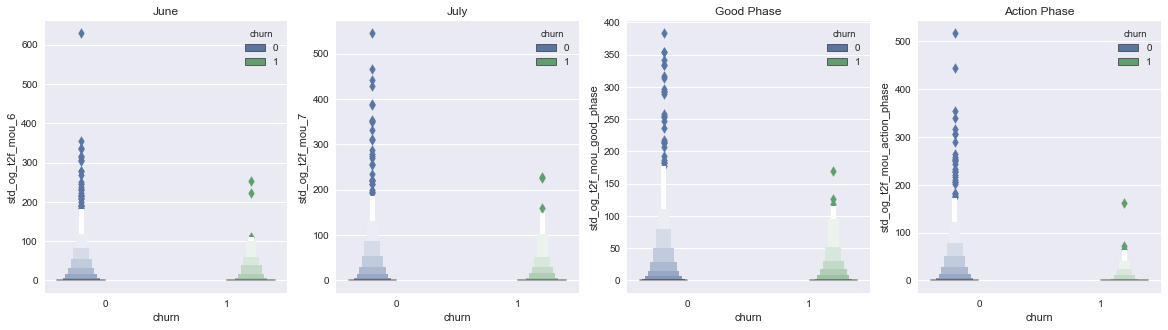

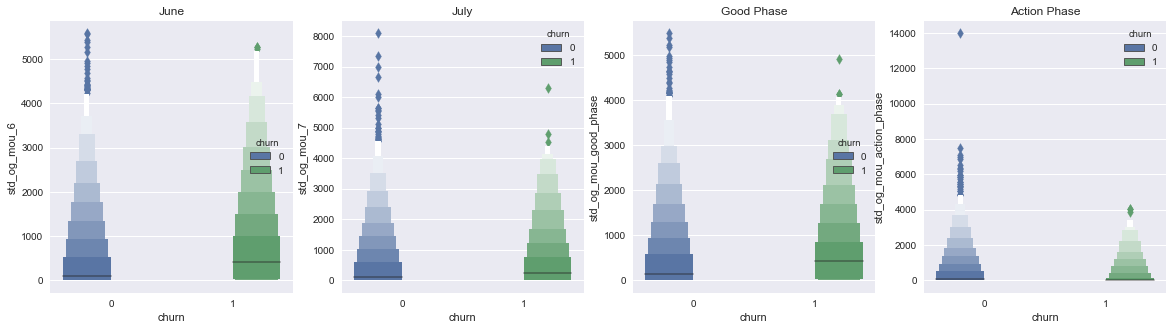

In [45]:
analyze_feature('std_og_t2t_mou')
analyze_feature('std_og_t2m_mou')
analyze_feature('std_og_t2f_mou')
analyze_feature('std_og_mou')


* STD Outgoing calls to fixed line are significantly decreased during Action Phase for the customers who are churning out.
* STD Outgoing calls to mobiles are significantly decreased during Action Phase for the customers who are churning out. 
* STD Outgoing calls in general are significantly decreased during Action Phase for the customers who are churning out. 
* Overall all the there is a significant decrease in Outgoing STD calls for the customers who are churning out.

#### STD Incoming Calls

,mean_6,mean_7,mean_action,mean_good,std_6,std_7,std_action,std_good
Churned,49.97,53.66,50.71,51.82,137.75,148.85,142.59,134.18
Non Churned,59.05,46.35,15.75,52.70,158.69,148.98,63.66,137.64


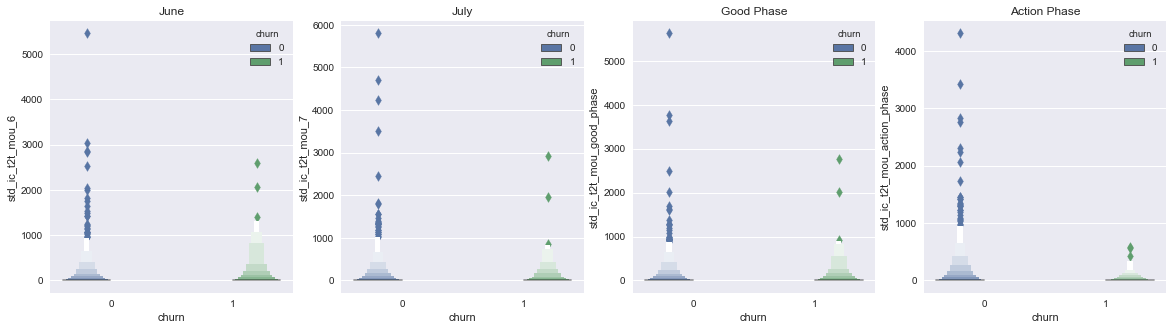

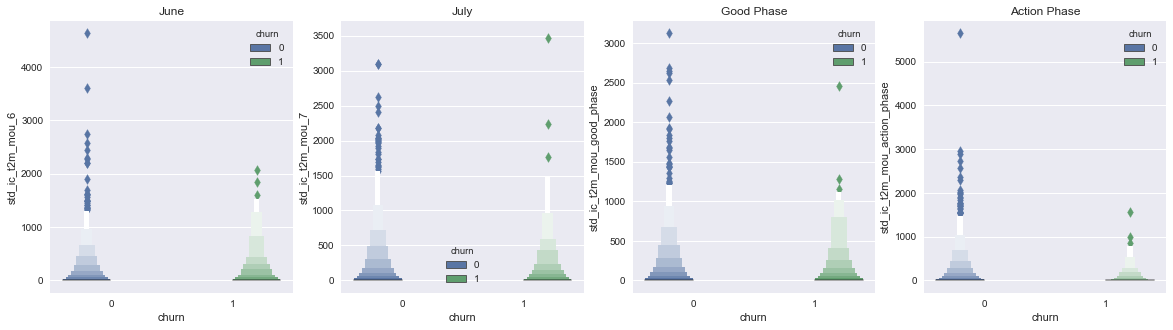

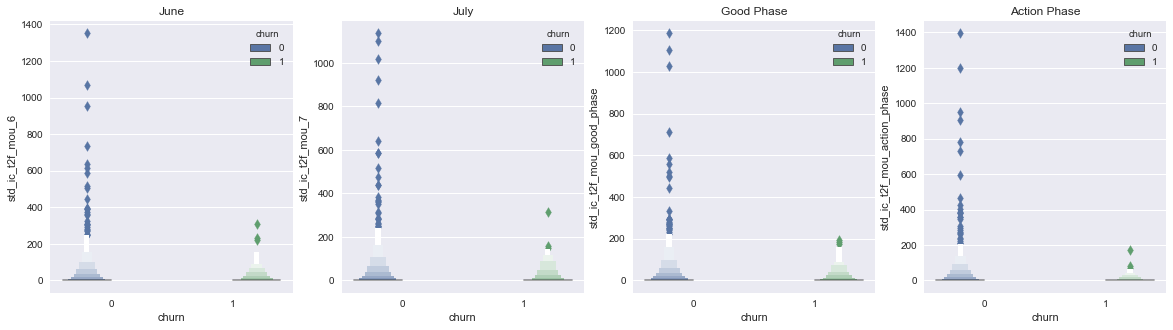

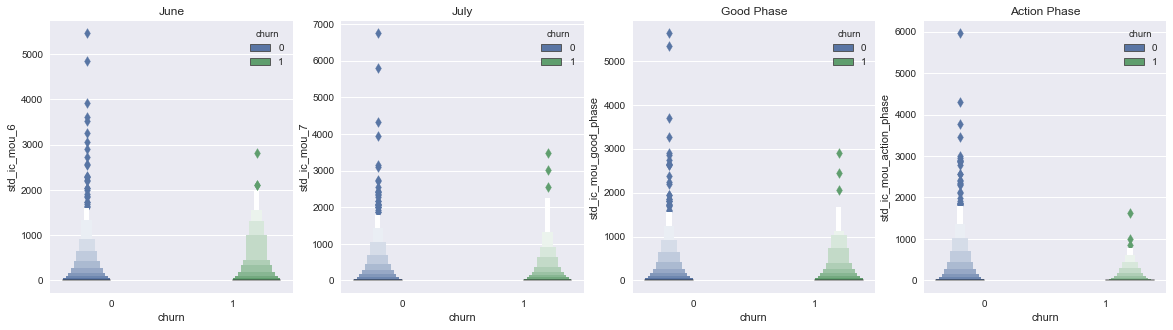

In [46]:
analyze_feature('std_ic_t2t_mou')
analyze_feature('std_ic_t2m_mou')
analyze_feature('std_ic_t2f_mou')
analyze_feature('std_ic_mou')

* STD Incoming calls in general are significantly decreased during Action Phase for the customers who are churning out. 
* Higher the incoming calls the chances of the churning out is less.

### Roaming Calls

Lets take out all column names related to Roaming Calls


In [47]:
roam_calls_columns =  churn_data.columns[churn_data.columns.str.contains('roam')]

roam_calls_columns

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_action_phase',
       'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_action_phase',
       'roam_ic_mou_good_phase', 'roam_og_mou_good_phase'],
      dtype='object')

#### Roaming Outgoing Calls

,mean_6,mean_7,mean_action,mean_good,std_6,std_7,std_action,std_good
Churned,26.30,18.60,18.69,22.45,103.72,84.45,94.64,80.95
Non Churned,51.25,48.38,42.62,49.82,180.50,147.46,135.87,144.20


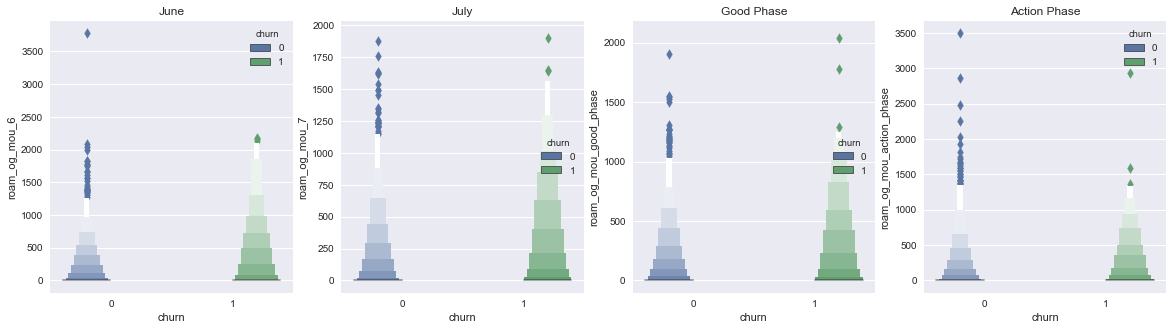

In [48]:
analyze_feature('roam_og_mou')


* Customers who curned out had a significant usage of outgoing calls on roaming in month of July and drastically dicreased during action phase. We can infer that people who are churning out are not happy about outgoing calls during roaming.

#### Roaming Incoming Calls

,mean_6,mean_7,mean_action,mean_good,std_6,std_7,std_action,std_good
Churned,16.03,11.69,11.63,13.86,70.13,66.33,67.02,58.01
Non Churned,29.17,28.89,26.28,29.03,134.13,128.85,110.07,117.44


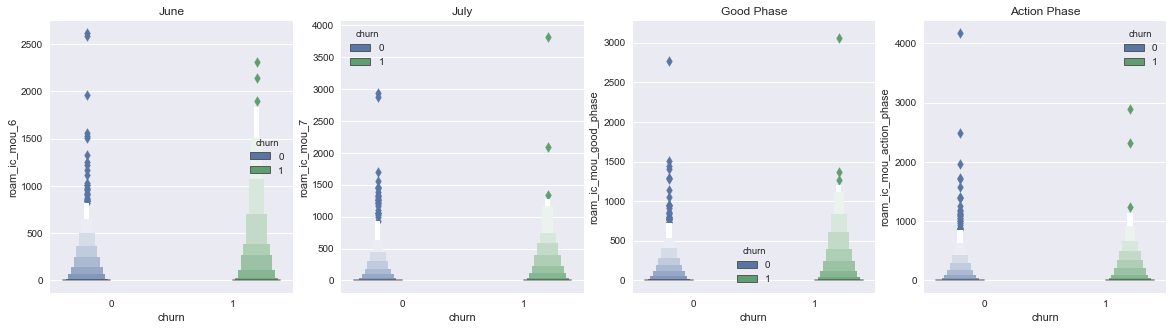

In [49]:
analyze_feature('roam_ic_mou')

* The usage of the incoming facility during roaming is studyly decreasing month on month for the customers who are churning out. 


# Model Building

Loading some more packages of rbuilding ML models

In [54]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Seperating out X and y

In [55]:
from sklearn.model_selection import train_test_split
X = churn_data.drop(['churn'], axis=1)
y = churn_data['churn']

Splitting into train, test and cross validation data

In [56]:
# split the data into test and train by maintaining same distribution of output varaible 'y_true' [stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
# split the train data into train and cross validation by maintaining same distribution of output varaible 'y_train' [stratify=y_train]
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2)

Lets scale the data which is a must for PCA

In [57]:
# Data-preprocessing: Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_df = sc.fit_transform(train_df)
test_df = sc.transform(test_df)
cv_df = sc.transform(cv_df)

In [58]:
# Lets save these variables for second model before applying PCA
train_imp = train_df.copy()
test_imp = test_df.copy()
cv_imp = cv_df.copy()


In [59]:
# so, we ave 190 columns
cv_df.shape

(4798, 190)

In [60]:
# initializing the pca
from sklearn import decomposition
pca = decomposition.PCA()

We will be plotting a graph in order to look at the variance loss here.

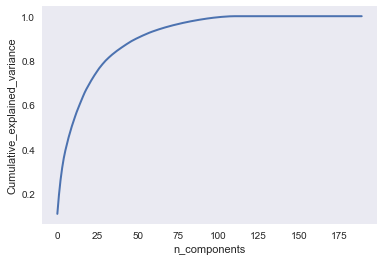

In [61]:
# PCA for dimensionality redcution
import matplotlib.pyplot as plt
pca.n_components = 190
pca_data = pca.fit_transform(train_df)

percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);

cum_var_explained = np.cumsum(percentage_var_explained)

# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))

plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()


In [62]:
# Zo we have around 80% variance explained with 30 columns so we can go with that
cum_var_explained[30]

0.8000701745958988

As we can notice with around 30 column we have variance explained around 80% so we will go with that.

In [63]:
# configuring the parameteres
# the number of components = 50
pca.n_components = 30
train_df = pca.fit_transform(train_df)
test_df = pca.transform(test_df)
cv_df = pca.transform(cv_df)

# pca_reduced will contain the 2-d projects of simple data
print("shape of train_df.shape = ", train_df.shape)
print("shape of test_df.shape = ", test_df.shape)
print("shape of cv_df.shape = ", cv_df.shape)

shape of train_df.shape =  (19189, 30)
shape of test_df.shape =  (5997, 30)
shape of cv_df.shape =  (4798, 30)


So now we have 30 columns to deal with for our modeling purpose

In [64]:
train_class_distribution = y_train.value_counts().sortlevel()

Lets look the distribution of data in train, test, CV for 0 and 1

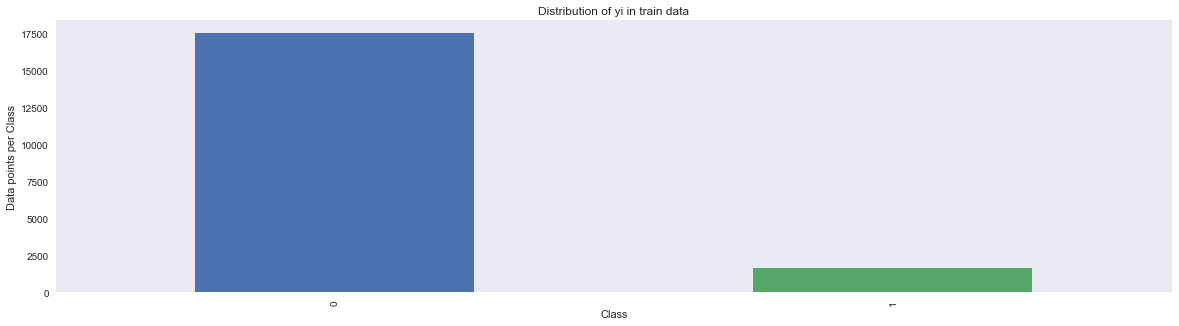

In [65]:
# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train.value_counts().sortlevel()
test_class_distribution = y_test.value_counts().sortlevel()
cv_class_distribution = y_cv.value_counts().sortlevel()

my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in train data')
plt.grid()
plt.show()


In [66]:
# Looking at distribution
train_class_distribution

0    17532
1     1657
Name: churn, dtype: int64

In [67]:
# Looking at percentage
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/train_df.shape[0]*100), 3), '%)')

Number of data points in class 1 : 17532 ( 91.365 %)
Number of data points in class 2 : 1657 ( 8.635 %)


Let's visualize the same for test set

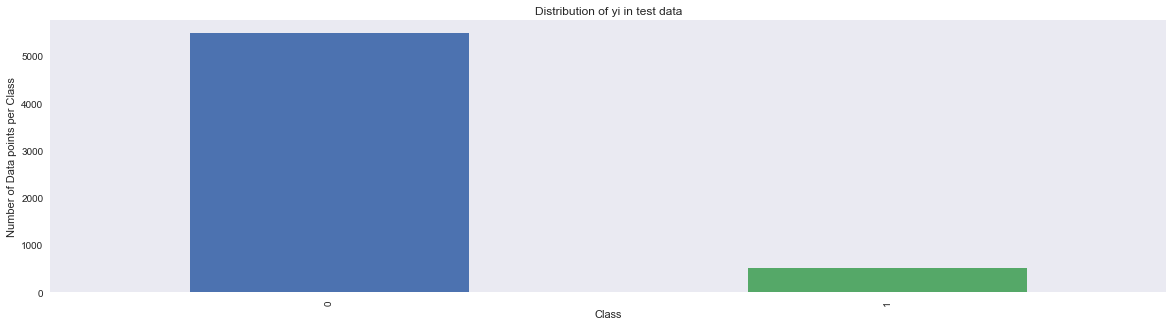

In [68]:
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Number of Data points per Class')
plt.title('Distribution of yi in test data')
plt.grid()
plt.show()

In [69]:
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/test_df.shape[0]*100), 3), '%)')

Number of data points in class 1 : 5479 ( 91.362 %)
Number of data points in class 2 : 518 ( 8.638 %)


Let's visualize for cross validation set

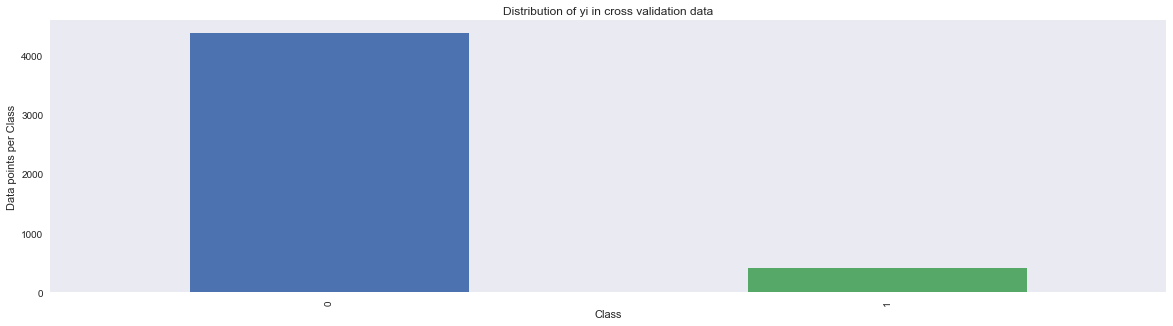

In [70]:
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of yi in cross validation data')
plt.grid()
plt.show()

In [71]:
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/cv_df.shape[0]*100), 3), '%)')

Number of data points in class 1 : 4384 ( 91.371 %)
Number of data points in class 2 : 414 ( 8.629 %)


So, we can notice almost same distribution of 1 and 0 values in train, test and CV

Now question is because we need log-loss as final evaluation metrics how do we say that model we are going to build will be good model. For doing this we will build a random model and will evaluate log loss. Our model should return lower log loss value than this..

## Building a Random model

Ok, so we need to generate random numbers because we have 2 class such that their sum must be equal to 1 because sum of Probablity of all 2 classes must be equivalent to 1.

In [72]:
test_data_len = test_df.shape[0]
cv_data_len = cv_df.shape[0]

In [73]:
# we create a output array that has exactly same size as the CV data
cv_predicted_y = np.zeros((cv_data_len,2))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1,2)
    cv_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model",log_loss(y_cv,cv_predicted_y, eps=1e-15))

Log loss on Cross Validation Data using Random Model 0.8725005369341784


In [74]:
# Test-Set error.
#we create a output array that has exactly same as the test data
test_predicted_y = np.zeros((test_data_len,2))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,2)
    test_predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))

Log loss on Test Data using Random Model 0.8908373831090386


Our models must have log loss lesser than 0.89 in order to be considered as well

In [75]:
# Lets get the index of max probablity
predicted_y =np.argmax(test_predicted_y, axis=1)

In [76]:
predicted_y

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

Lets write a function to get confusion matrix, Precision and recall

In [77]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    
    labels = [0,1]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Lets run this on random model and check confusion matrix, Precision and Recall

-------------------- Confusion matrix --------------------


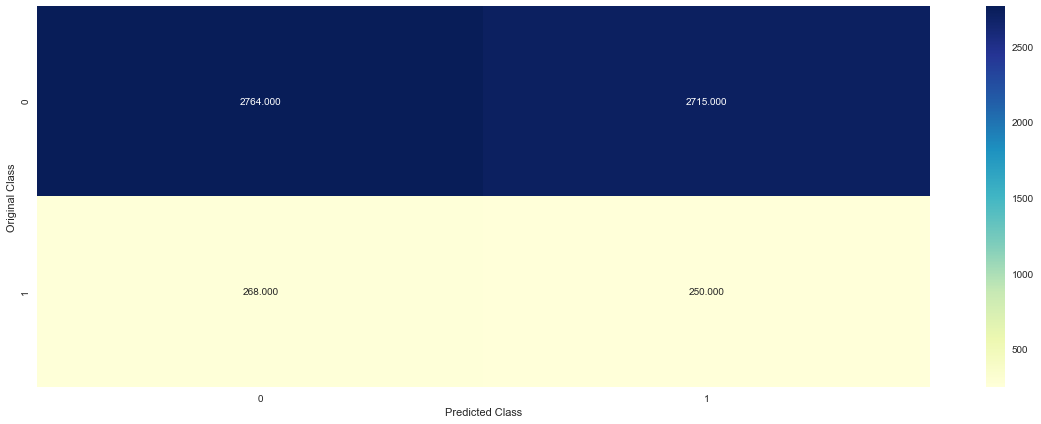

-------------------- Precision matrix (Columm Sum=1) --------------------


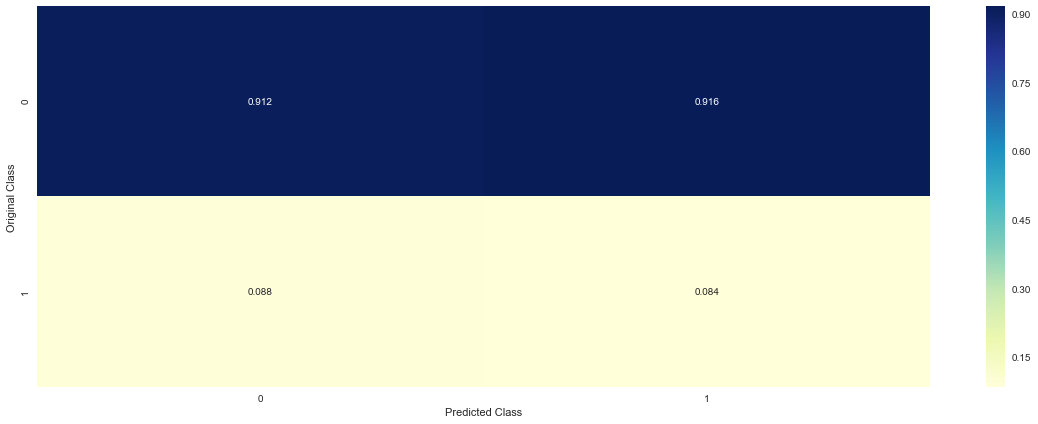

-------------------- Recall matrix (Row sum=1) --------------------


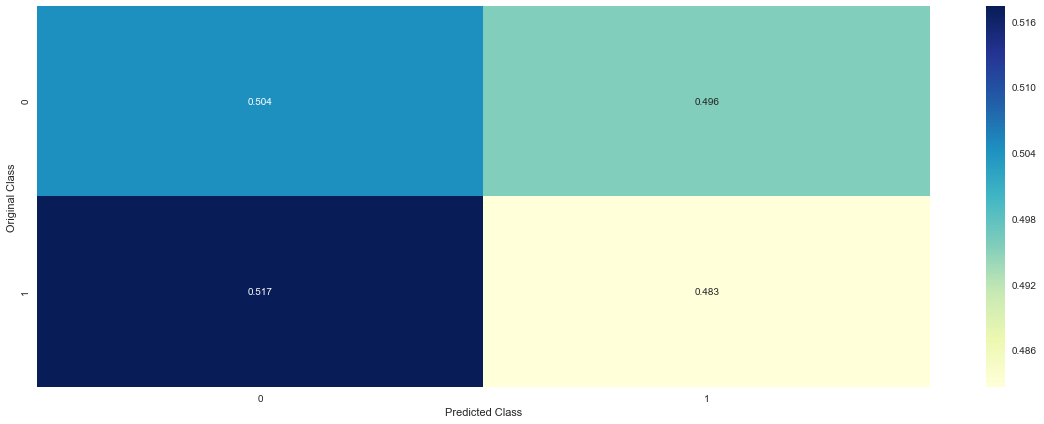

In [78]:
plot_confusion_matrix(y_test, predicted_y)

As expected results are quite bad since its a random model

# Building Clasification Machine Learning Model

Now lets build model one by one. We have done hyper param tuning but have used different way rather than ***GridSearchCV*** because we were landing up with out of memory issues. GridSearchCV we will use in second model which will be used to get all important columns

In [79]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

For a better comparision od model we have choosen to go with log loss metric. Infact it is one of most loved metric by Kaggle competition and widely used in industry since its even include the property of comparision of model

In [80]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [81]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs, drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [82]:
def test_evaluation_score(y_test,test_df,clf):
    draw_roc(y_test,clf.predict(test_df))
    cm = confusion_matrix(y_test, clf.predict(test_df))
    total=sum(sum(cm))
    tp = cm[1,1]
    fn = cm[1,0]
    fp = cm[0,1]
    tn = cm[0,0]
    accuracy = (tn + tp)/total
    sensitivity = tp/(tp + fn)
    specificity = tn/(tn + fp)
    precision = tp/(tp+fp)
    recall = tp/(tp + fn)
    fallout = fp/(fp + tn)
    auc = roc_auc_score(y_test,clf.predict(test_df))
    print ('================================================')
    print('Accuracy =     {:.3f}'.format(accuracy))
    print('Sensitivity =     {:.3f}'.format(sensitivity))
    print('Specificity  =     {:.3f}'.format(specificity))
    print('Precision =     {:.3f}'.format(precision))
    print('Recall (TPR) =  {:.3f}'.format(recall))
    print('Fallout  = {:.3f}'.format(fallout))
    print('AUC = {:.3f}'.format(auc))
    print ('------------------------------------------------')
    print('Confusion Matrix')
    print (cm)
    print ('------------------------------------------------')
    print(classification_report(y_test, clf.predict(test_df), target_names=['not_churn', 'churn']))
    print ('------------------------------------------------')

# Logistic Regression

### Balancing all classes

Lets run the logistic regression while balancing the data

In [83]:
from sklearn.linear_model import SGDClassifier

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

for alpha = 1e-06
Log Loss : 0.2464167967400537
for alpha = 1e-05
Log Loss : 0.24635589822675608
for alpha = 0.0001
Log Loss : 0.24816101333114177
for alpha = 0.001
Log Loss : 0.23095219150831486
for alpha = 0.01
Log Loss : 0.22064755693212437
for alpha = 0.1
Log Loss : 0.2144044532698268
for alpha = 1
Log Loss : 0.21879008374221842
for alpha = 10
Log Loss : 0.23239069549381502
for alpha = 100
Log Loss : 0.23821989640399116


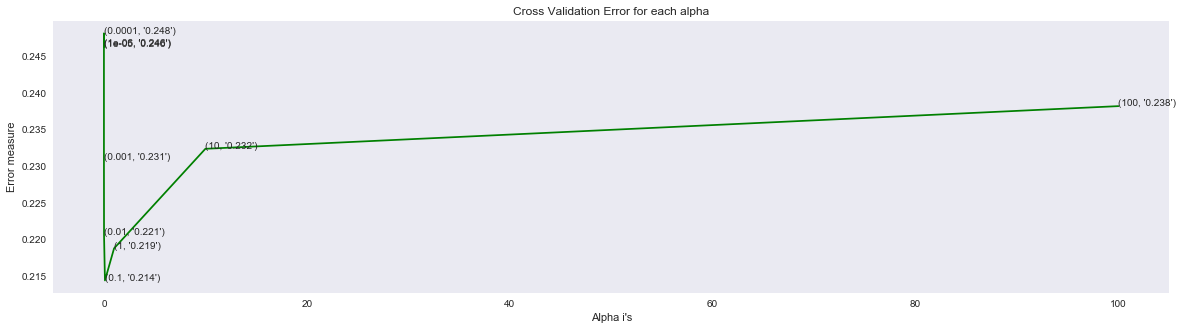

In [84]:
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [85]:
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best alpha =  0.1 The train log loss is: 0.21085166391094906
For values of best alpha =  0.1 The cross validation log loss is: 0.2144044532698268
For values of best alpha =  0.1 The test log loss is: 0.2201997563685776


Log loss : 0.2144044532698268
Number of mis-classified points : 0.08420175072947061
-------------------- Confusion matrix --------------------


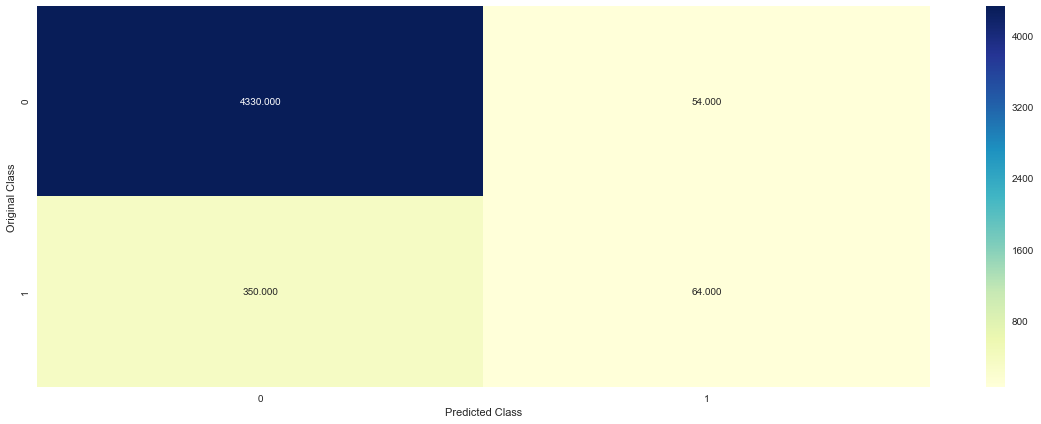

-------------------- Precision matrix (Columm Sum=1) --------------------


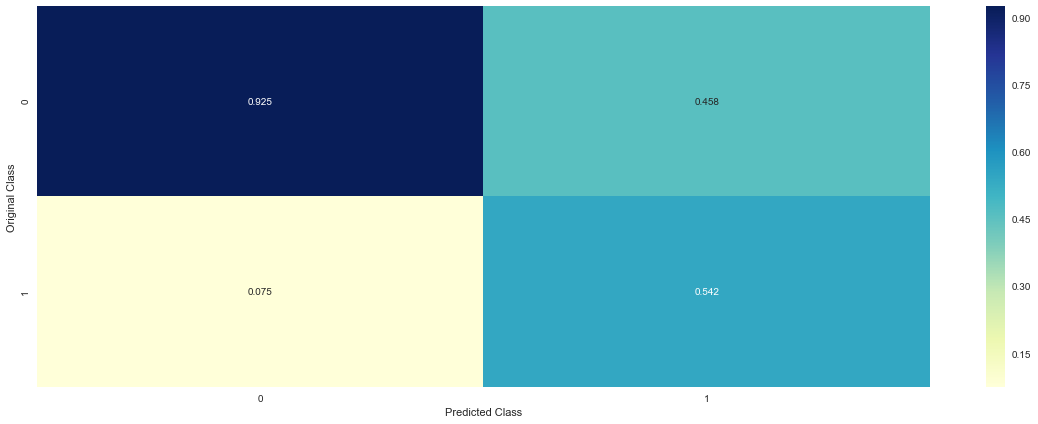

-------------------- Recall matrix (Row sum=1) --------------------


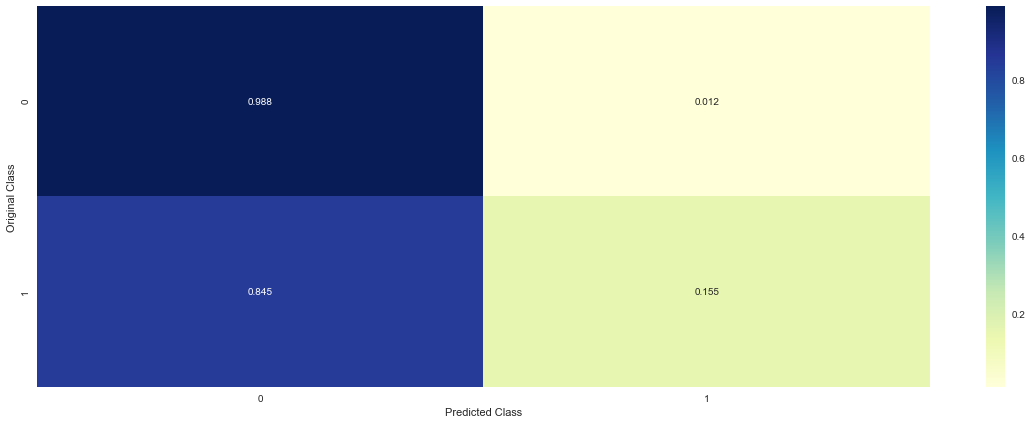

In [86]:
# Look at confusion matrix
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

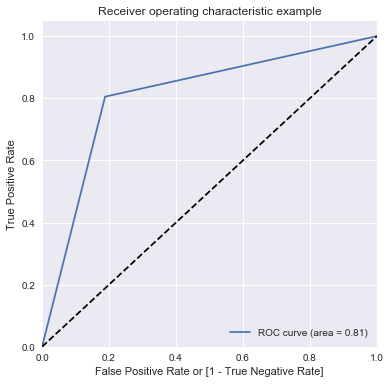

Accuracy =     0.811
Sensitivity =     0.805
Specificity  =     0.812
Precision =     0.288
Recall (TPR) =  0.805
Fallout  = 0.188
AUC = 0.808
------------------------------------------------
Confusion Matrix
[[4448 1031]
 [ 101  417]]
------------------------------------------------
              precision    recall  f1-score   support

   not_churn       0.98      0.81      0.89      5479
       churn       0.29      0.81      0.42       518

   micro avg       0.81      0.81      0.81      5997
   macro avg       0.63      0.81      0.66      5997
weighted avg       0.92      0.81      0.85      5997

------------------------------------------------


In [87]:
test_evaluation_score(y_test,test_df,clf)

## Logistic regression again  Without class balancing

In [88]:
alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

for alpha = 1e-06
Log Loss : 0.2501856385748043
for alpha = 1e-05
Log Loss : 0.25785834712098965
for alpha = 0.0001
Log Loss : 0.24542339713288205
for alpha = 0.001
Log Loss : 0.22188560689049713
for alpha = 0.01
Log Loss : 0.22508871927406007
for alpha = 0.1
Log Loss : 0.22536661189938698
for alpha = 1
Log Loss : 0.22353055725589374


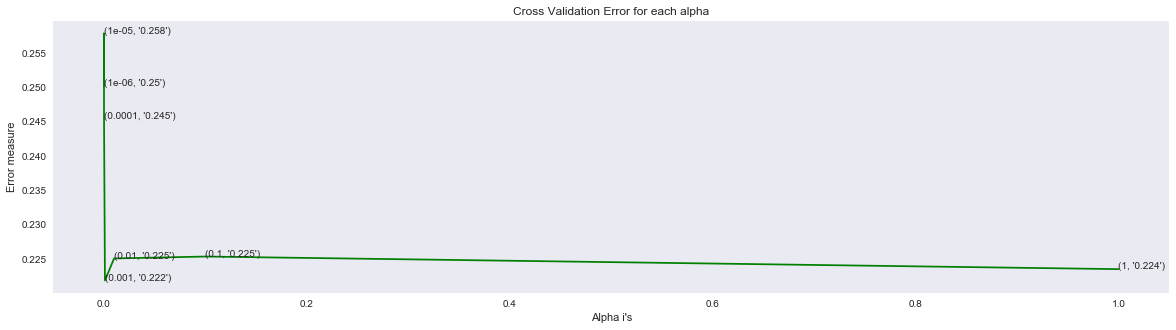

In [89]:
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [90]:
best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best alpha =  0.001 The train log loss is: 0.21825049525033738
For values of best alpha =  0.001 The cross validation log loss is: 0.22188560689049713
For values of best alpha =  0.001 The test log loss is: 0.22742175761295708


Log loss : 0.22188560689049713
Number of mis-classified points : 0.08482701125468946
-------------------- Confusion matrix --------------------


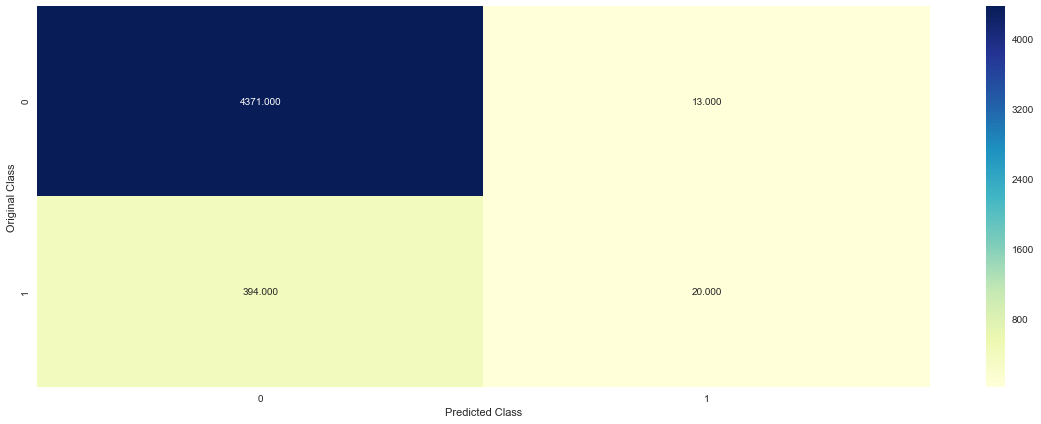

-------------------- Precision matrix (Columm Sum=1) --------------------


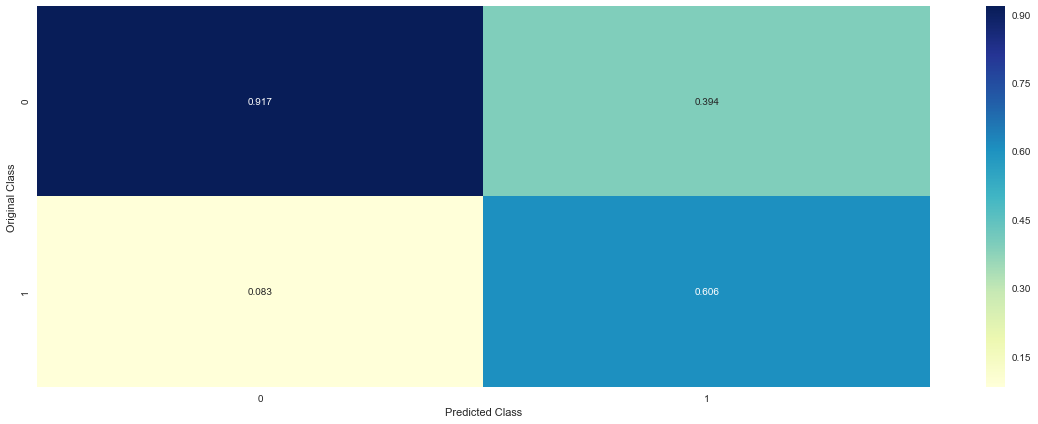

-------------------- Recall matrix (Row sum=1) --------------------


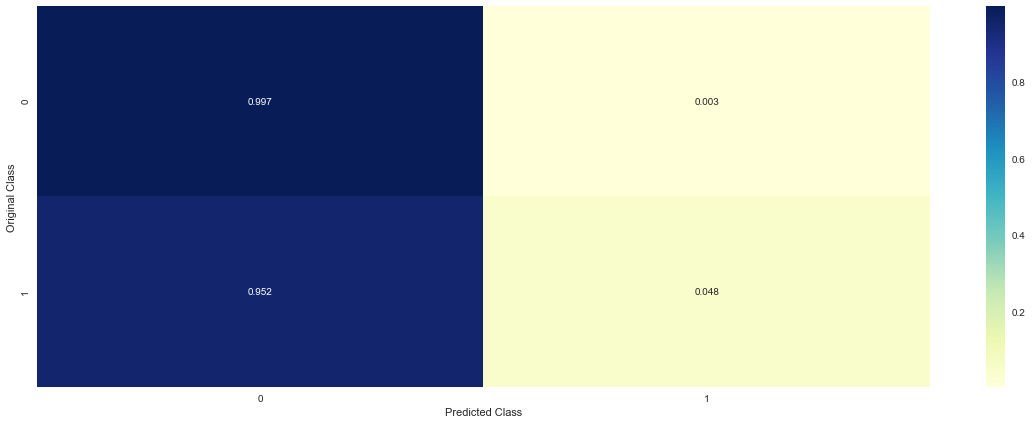

In [91]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

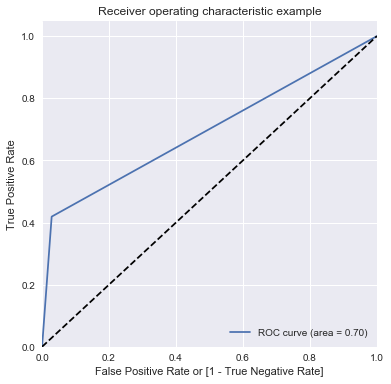

Accuracy =     0.924
Sensitivity =     0.419
Specificity  =     0.971
Precision =     0.580
Recall (TPR) =  0.419
Fallout  = 0.029
AUC = 0.695
------------------------------------------------
Confusion Matrix
[[5322  157]
 [ 301  217]]
------------------------------------------------
              precision    recall  f1-score   support

   not_churn       0.95      0.97      0.96      5479
       churn       0.58      0.42      0.49       518

   micro avg       0.92      0.92      0.92      5997
   macro avg       0.76      0.70      0.72      5997
weighted avg       0.91      0.92      0.92      5997

------------------------------------------------


In [92]:
test_evaluation_score(y_test,test_df,clf)

# Linear Support Vector Machines

for C = 1e-05
Log Loss : 0.2563252376693783
for C = 0.0001
Log Loss : 0.23897939328464535
for C = 0.001
Log Loss : 0.23735081315933648
for C = 0.01
Log Loss : 0.22460036493529575
for C = 0.1
Log Loss : 0.2155512772630452
for C = 1
Log Loss : 0.21583624305789306
for C = 10
Log Loss : 0.23366627958894917
for C = 100
Log Loss : 0.2390879193999472


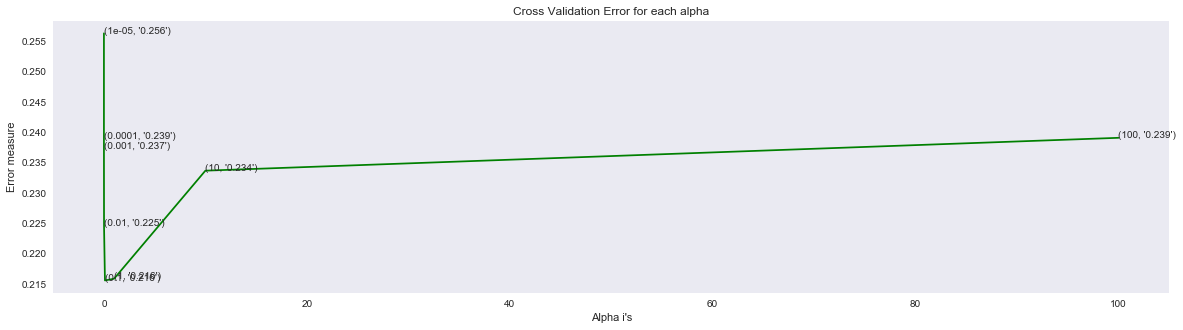

For values of best alpha =  0.1 The train log loss is: 0.20994284382975215
For values of best alpha =  0.1 The cross validation log loss is: 0.2155512772630452
For values of best alpha =  0.1 The test log loss is: 0.21929142846252087


In [93]:
alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log loss : 0.2155512772630452
Number of mis-classified points : 0.08378491037932471
-------------------- Confusion matrix --------------------


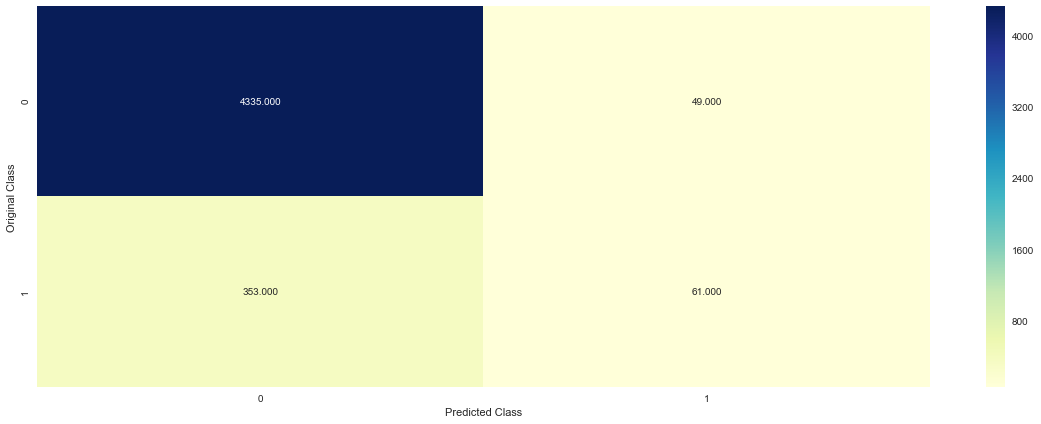

-------------------- Precision matrix (Columm Sum=1) --------------------


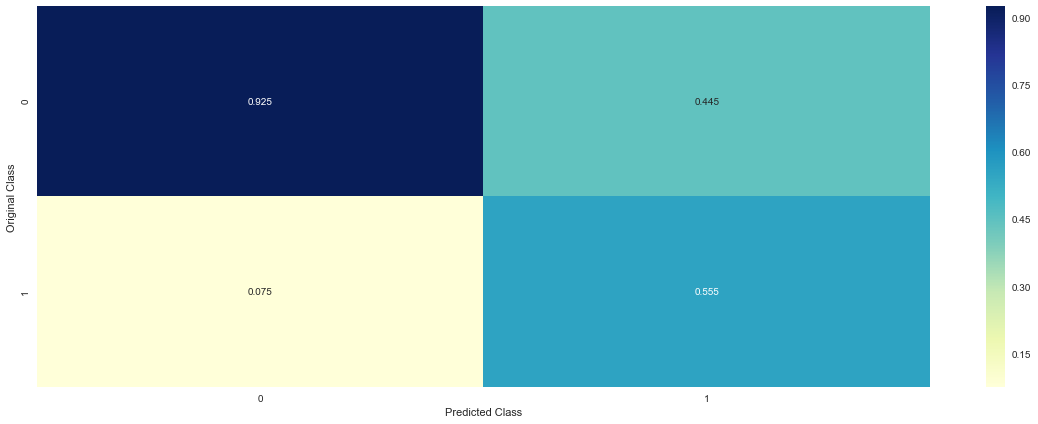

-------------------- Recall matrix (Row sum=1) --------------------


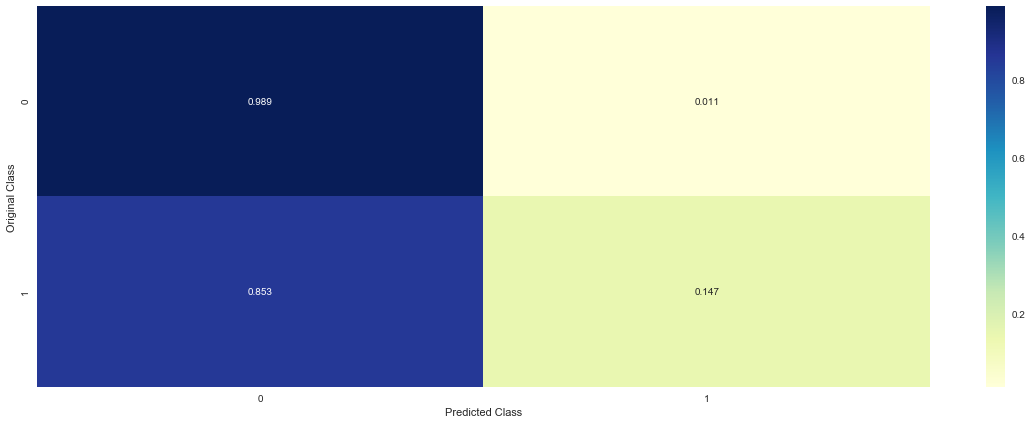

In [94]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_df, y_train,cv_df,y_cv, clf)

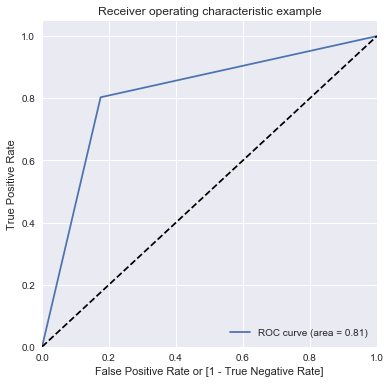

Accuracy =     0.823
Sensitivity =     0.803
Specificity  =     0.825
Precision =     0.303
Recall (TPR) =  0.803
Fallout  = 0.175
AUC = 0.814
------------------------------------------------
Confusion Matrix
[[4521  958]
 [ 102  416]]
------------------------------------------------
              precision    recall  f1-score   support

   not_churn       0.98      0.83      0.90      5479
       churn       0.30      0.80      0.44       518

   micro avg       0.82      0.82      0.82      5997
   macro avg       0.64      0.81      0.67      5997
weighted avg       0.92      0.82      0.86      5997

------------------------------------------------


In [95]:
test_evaluation_score(y_test,test_df,clf)

# Random Forest Classifier

In [96]:
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_df, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_df, y_train)
        sig_clf_probs = sig_clf.predict_proba(cv_df)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

for n_estimators = 100 and max depth =  5
Log Loss : 0.21489077703359888
for n_estimators = 100 and max depth =  10
Log Loss : 0.2106210112312917
for n_estimators = 200 and max depth =  5
Log Loss : 0.2166143623987473
for n_estimators = 200 and max depth =  10
Log Loss : 0.2107551270428008
for n_estimators = 500 and max depth =  5
Log Loss : 0.21691933517588943
for n_estimators = 500 and max depth =  10
Log Loss : 0.20986692392832568
for n_estimators = 1000 and max depth =  5
Log Loss : 0.21705257017591875
for n_estimators = 1000 and max depth =  10
Log Loss : 0.2101626728912518
for n_estimators = 2000 and max depth =  5
Log Loss : 0.21713767990737
for n_estimators = 2000 and max depth =  10
Log Loss : 0.21015331754268318


In [97]:
best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

For values of best estimator =  500 The train log loss is: 0.12400616762688807
For values of best estimator =  500 The cross validation log loss is: 0.20986692392832568
For values of best estimator =  500 The test log loss is: 0.20895027306929492


Log loss : 0.20986692392832568
Number of mis-classified points : 0.07669862442684452
-------------------- Confusion matrix --------------------


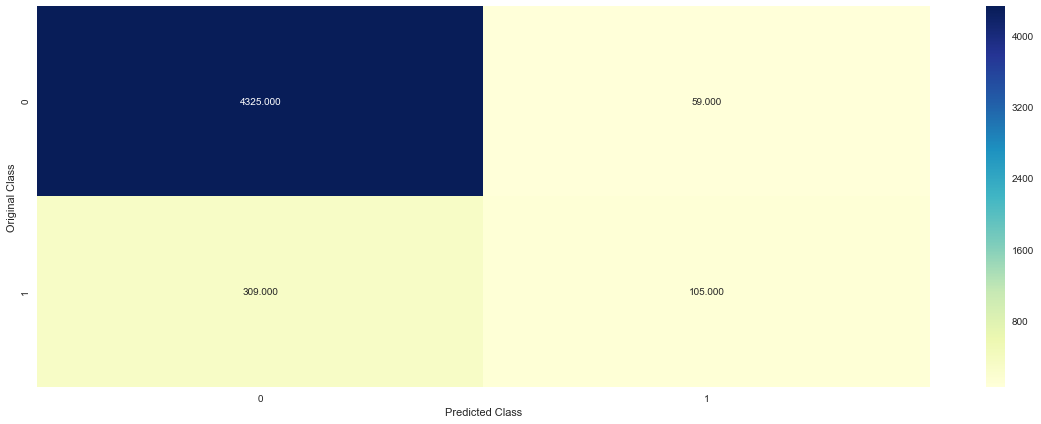

-------------------- Precision matrix (Columm Sum=1) --------------------


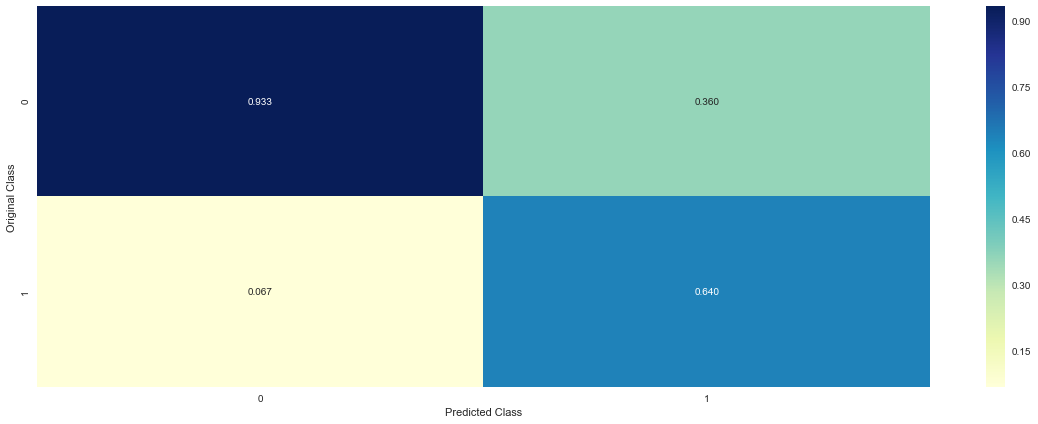

-------------------- Recall matrix (Row sum=1) --------------------


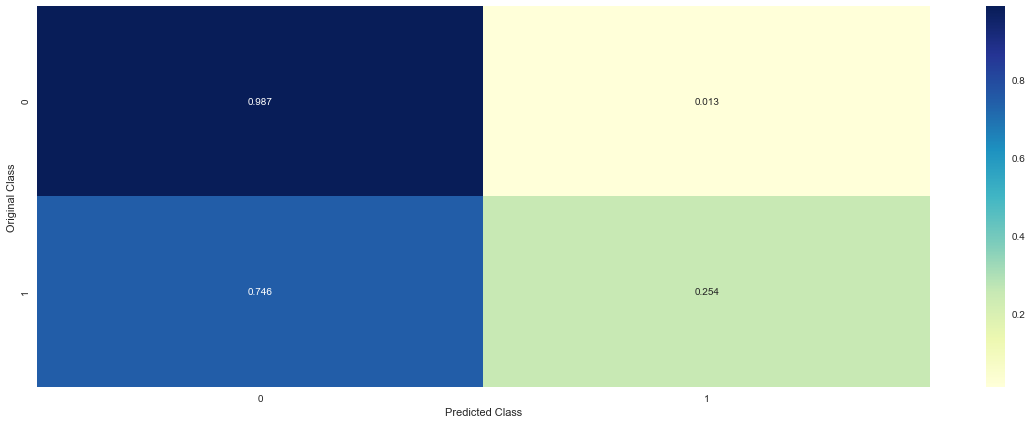

In [98]:
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_df, y_train,cv_df,y_cv, clf)

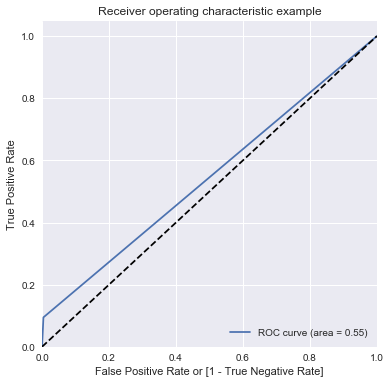

Accuracy =     0.918
Sensitivity =     0.095
Specificity  =     0.996
Precision =     0.690
Recall (TPR) =  0.095
Fallout  = 0.004
AUC = 0.545
------------------------------------------------
Confusion Matrix
[[5457   22]
 [ 469   49]]
------------------------------------------------
              precision    recall  f1-score   support

   not_churn       0.92      1.00      0.96      5479
       churn       0.69      0.09      0.17       518

   micro avg       0.92      0.92      0.92      5997
   macro avg       0.81      0.55      0.56      5997
weighted avg       0.90      0.92      0.89      5997

------------------------------------------------


In [99]:
test_evaluation_score(y_test,test_df,clf)

# K Nearest Neighbour Classification

In [100]:
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_df, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs))

for alpha = 5
Log Loss : 0.23855155130768976
for alpha = 11
Log Loss : 0.22921201193527643
for alpha = 15
Log Loss : 0.22620233750460905
for alpha = 21
Log Loss : 0.22426616382024878
for alpha = 31
Log Loss : 0.22086517837508732
for alpha = 41
Log Loss : 0.22142306095315661
for alpha = 51
Log Loss : 0.22130079792267446
for alpha = 99
Log Loss : 0.22095897426361083


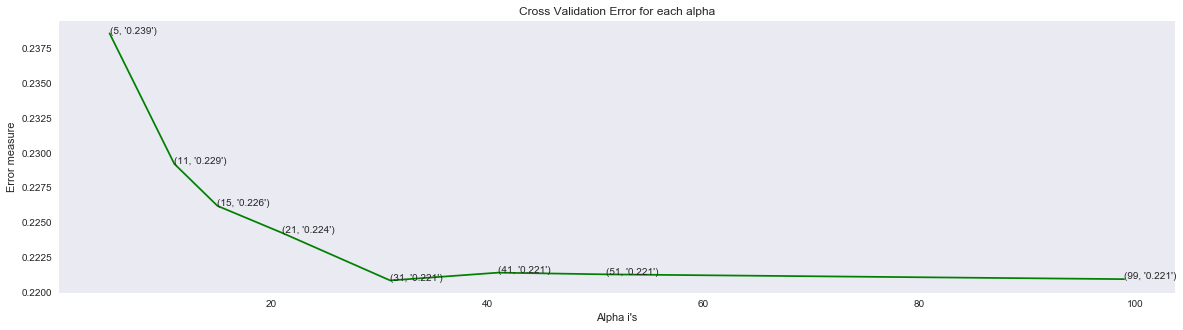

In [101]:
fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

In [103]:
best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_df, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))



For values of best alpha =  31 The train log loss is: 0.2132476714783542
For values of best alpha =  31 The cross validation log loss is: 0.22086517837508732
For values of best alpha =  31 The test log loss is: 0.22173618638038234


Log loss : 0.22086517837508732
Number of mis-classified points : 0.08045018757815757
-------------------- Confusion matrix --------------------


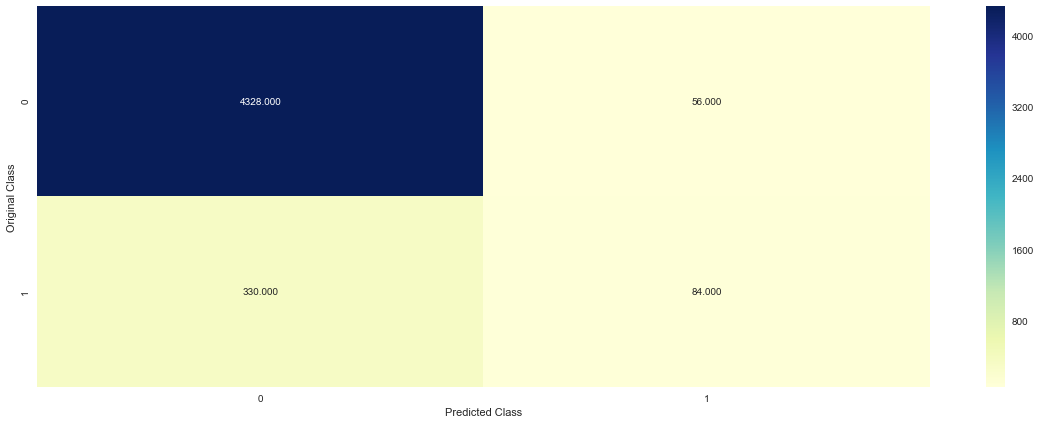

-------------------- Precision matrix (Columm Sum=1) --------------------


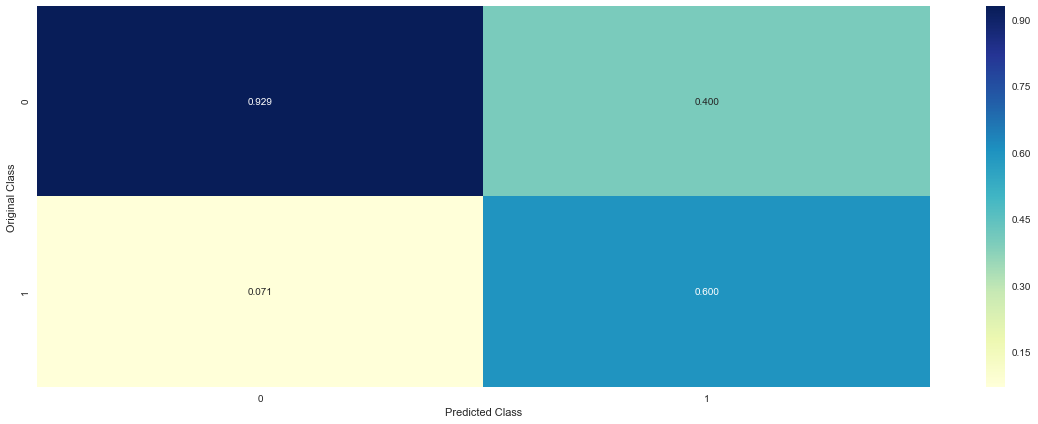

-------------------- Recall matrix (Row sum=1) --------------------


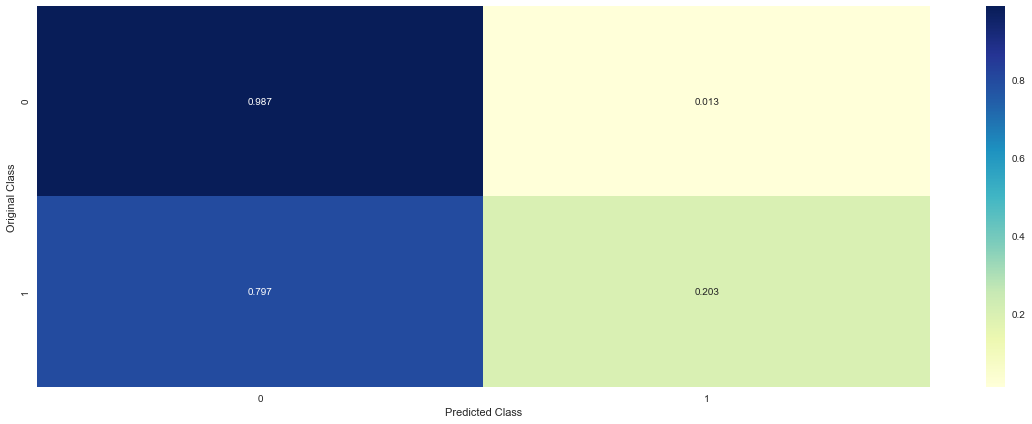

In [105]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_df, y_train, cv_df, y_cv, clf)

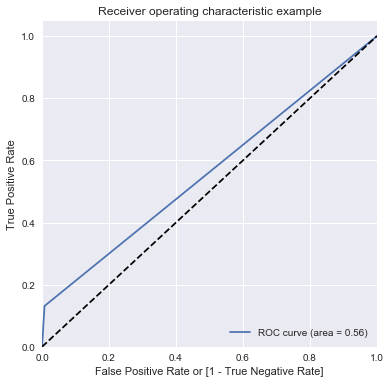

Accuracy =     0.918
Sensitivity =     0.131
Specificity  =     0.993
Precision =     0.630
Recall (TPR) =  0.131
Fallout  = 0.007
AUC = 0.562
------------------------------------------------
Confusion Matrix
[[5439   40]
 [ 450   68]]
------------------------------------------------
              precision    recall  f1-score   support

   not_churn       0.92      0.99      0.96      5479
       churn       0.63      0.13      0.22       518

   micro avg       0.92      0.92      0.92      5997
   macro avg       0.78      0.56      0.59      5997
weighted avg       0.90      0.92      0.89      5997

------------------------------------------------


In [106]:
test_evaluation_score(y_test,test_df,clf)

# <h2>  XgBoost Classifier without hyper param tuning</h3>

log_loss for c =  10 is 0.22825626241392893
log_loss for c =  50 is 0.20891451956464044
log_loss for c =  100 is 0.2065975436904543
log_loss for c =  500 is 0.20987170033235994
log_loss for c =  1000 is 0.21437090046516488
log_loss for c =  2000 is 0.22236084919423726
log_loss for c =  3000 is 0.22686593066160116


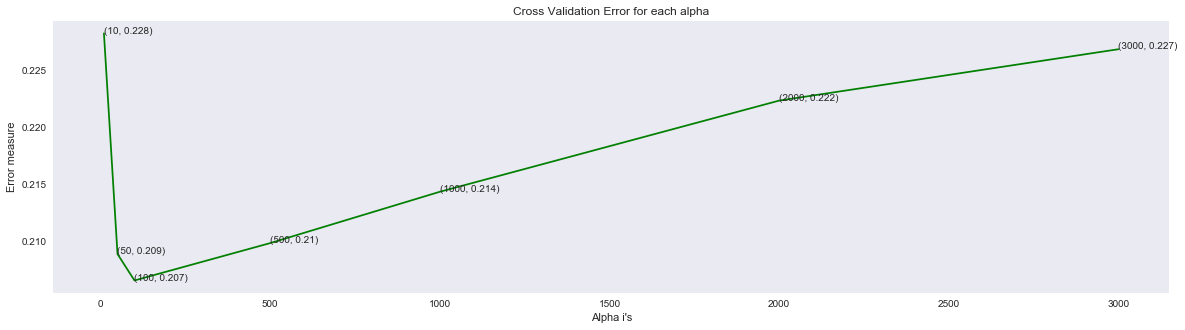

For values of best alpha =  100 The train log loss is: 0.0968844086354317
For values of best alpha =  100 The cross validation log loss is: 0.22686593066160116
For values of best alpha =  100 The test log loss is: 0.22085568824096602


In [108]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data

# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True, 
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1, 
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1, 
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)

# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep])	Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance

from xgboost import XGBClassifier
alpha=[10,50,100,500,1000,2000,3000]
cv_log_error_array=[]
for i in alpha:
    x_cfl=XGBClassifier(n_estimators=i)
    x_cfl.fit(train_df,y_train)
    sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
    sig_clf.fit(train_df, y_train)
    predict_y = sig_clf.predict_proba(cv_df)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=x_cfl.classes_, eps=1e-15))

for i in range(len(cv_log_error_array)):
    print ('log_loss for c = ',alpha[i],'is',cv_log_error_array[i])


best_alpha = np.argmin(cv_log_error_array)

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

x_cfl=XGBClassifier(n_estimators=3000,nthread=-1)
x_cfl.fit(train_df,y_train,verbose=True)
sig_clf = CalibratedClassifierCV(x_cfl, method="sigmoid")
sig_clf.fit(train_df, y_train)

predict_y = sig_clf.predict_proba(train_df)
print ('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y))
predict_y = sig_clf.predict_proba(cv_df)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y))
predict_y = sig_clf.predict_proba(test_df)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y))

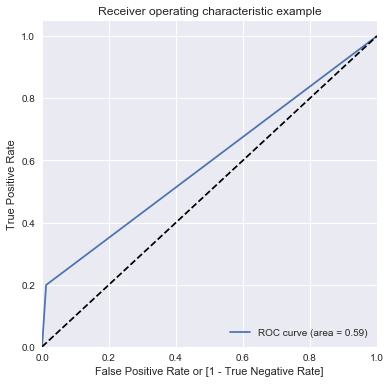

Accuracy =     0.920
Sensitivity =     0.199
Specificity  =     0.988
Precision =     0.609
Recall (TPR) =  0.199
Fallout  = 0.012
AUC = 0.593
------------------------------------------------
Confusion Matrix
[[5413   66]
 [ 415  103]]
------------------------------------------------
              precision    recall  f1-score   support

   not_churn       0.93      0.99      0.96      5479
       churn       0.61      0.20      0.30       518

   micro avg       0.92      0.92      0.92      5997
   macro avg       0.77      0.59      0.63      5997
weighted avg       0.90      0.92      0.90      5997

------------------------------------------------


In [109]:
test_evaluation_score(y_test,test_df,sig_clf)

# XGBoost with hyper parameter tuning

In [110]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(train_df, label=y_train)
d_test = xgb.DMatrix(test_df, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(train_df,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[18:27:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[0]	train-logloss:0.678428	valid-logloss:0.678492
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[18:27:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:10] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:10] C:\Users\Administrator\Desktop\xg

[18:27:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:14] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[18:27:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[110]	train-logloss:0.22675	valid-logloss:0.233802
[18:27:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:19] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:19] C:\Users\Administrator\Desktop\x

[18:27:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[160]	train-logloss:0.199957	valid-logloss:0.211416
[18:27:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:23] C:\Users\Administrator\Desktop\

[18:27:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:27] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[18:27:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:28] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

[18:27:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[270]	train-logloss:0.177439	valid-logloss:0.19913
[18:27:32] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 28 extra nodes, 0 pruned nodes, max_depth=4
[18:27:32] C:\Users\Administrator\Desktop\x

[18:27:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[320]	train-logloss:0.171933	valid-logloss:0.197732
[18:27:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:36] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[18:27:36] C:\Users\Administrator\Desktop\

[18:27:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 18 extra nodes, 0 pruned nodes, max_depth=4
[18:27:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:40] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 26 extra nodes, 0 pruned nodes, max_depth=4
[18:27:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 30 extra nodes, 0 pruned nodes, max_depth=4
[18:27:41] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning e

Total number of data points : 5997
-------------------- Confusion matrix --------------------


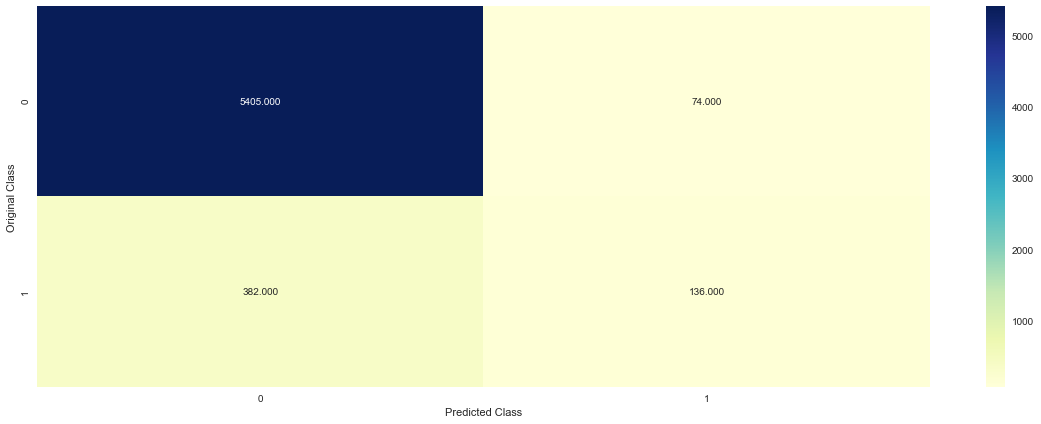

-------------------- Precision matrix (Columm Sum=1) --------------------


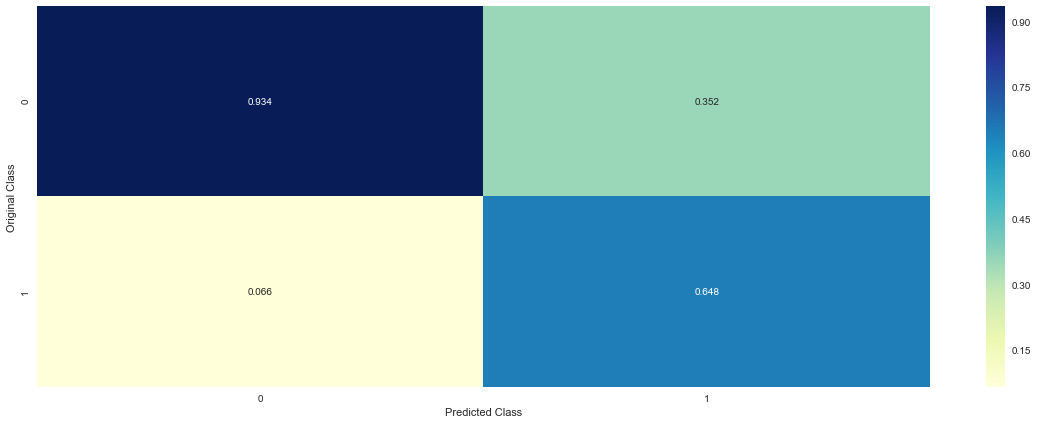

-------------------- Recall matrix (Row sum=1) --------------------


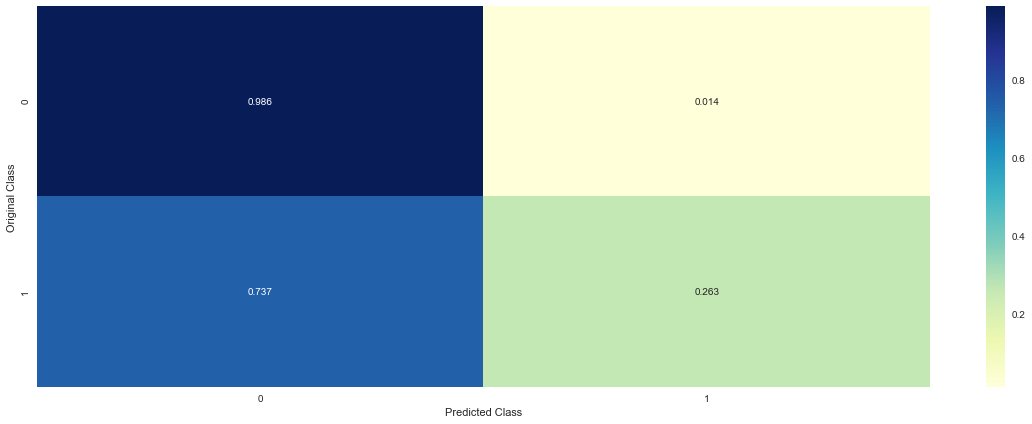

In [111]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# Stack the model

In [113]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.




# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.



# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).




clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_df, y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_df, y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


sig_clf1.fit(train_df, y_train)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(y_cv, sig_clf1.predict_proba(cv_df))))

sig_clf2.fit(train_df,y_train)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(y_cv, sig_clf2.predict_proba(cv_df))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2], meta_classifier=lr, use_probas=True)
    sclf.fit(train_df, y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(cv_df))))
    log_error =log_loss(y_cv, sclf.predict_proba(cv_df))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 0.25
Support vector machines : Log Loss: 0.22
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 0.394
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 0.277
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 0.237
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 0.221
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 0.219
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 0.219


Log loss (train) on the stacking classifier : 0.2187521557504606
Log loss (CV) on the stacking classifier : 0.22081821266020943
Log loss (test) on the stacking classifier : 0.2162200424948992
Number of missclassified point : 0.0817075204268801
-------------------- Confusion matrix --------------------


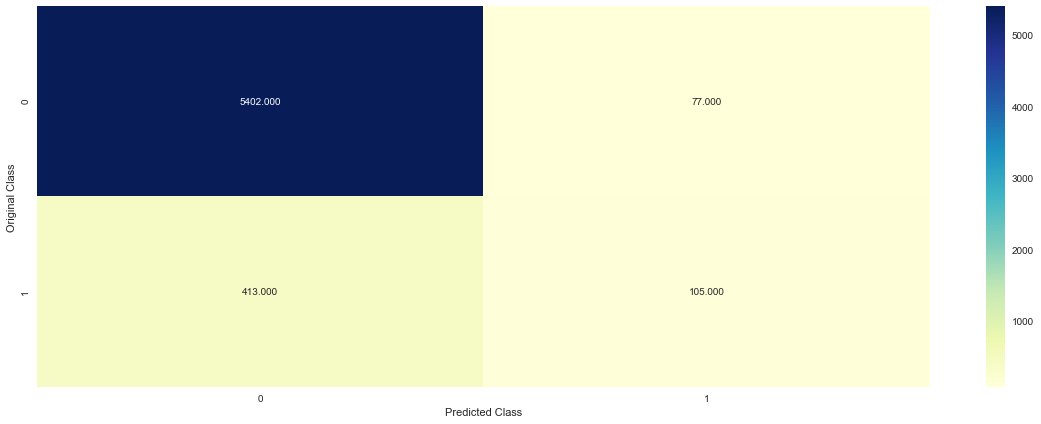

-------------------- Precision matrix (Columm Sum=1) --------------------


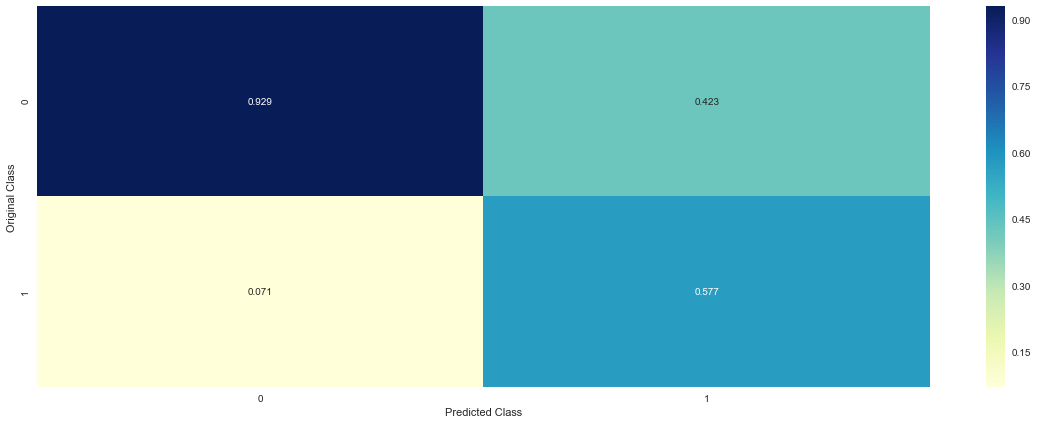

-------------------- Recall matrix (Row sum=1) --------------------


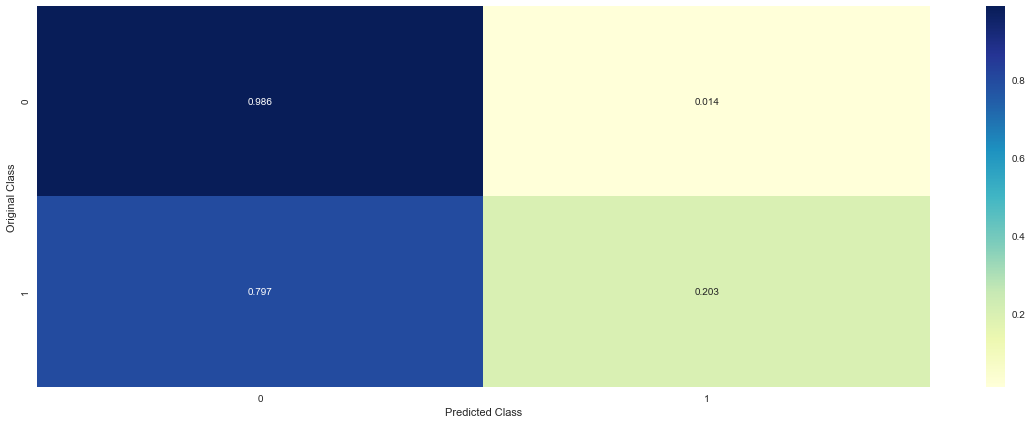

In [114]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2], meta_classifier=lr, use_probas=True)
sclf.fit(train_df, y_train)

log_error = log_loss(y_train, sclf.predict_proba(train_df))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(cv_df))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(test_df))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_df)- y_test))/y_test.shape[0])
plot_confusion_matrix(test_y=y_test, predict_y=sclf.predict(test_df))

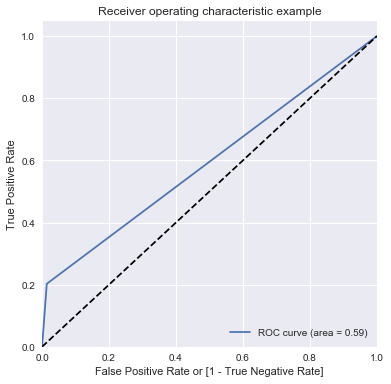

Accuracy =     0.918
Sensitivity =     0.203
Specificity  =     0.986
Precision =     0.577
Recall (TPR) =  0.203
Fallout  = 0.014
AUC = 0.594
------------------------------------------------
Confusion Matrix
[[5402   77]
 [ 413  105]]
------------------------------------------------
              precision    recall  f1-score   support

   not_churn       0.93      0.99      0.96      5479
       churn       0.58      0.20      0.30       518

   micro avg       0.92      0.92      0.92      5997
   macro avg       0.75      0.59      0.63      5997
weighted avg       0.90      0.92      0.90      5997

------------------------------------------------


In [115]:
test_evaluation_score(y_test,test_df,sclf)

# Maximum voting Classifier

Log loss (train) on the VotingClassifier : 0.22062786426571662
Log loss (CV) on the VotingClassifier : 0.2222516684670709
Log loss (test) on the VotingClassifier : 0.22141618261977547
Number of missclassified point : 0.08504252126063032
-------------------- Confusion matrix --------------------


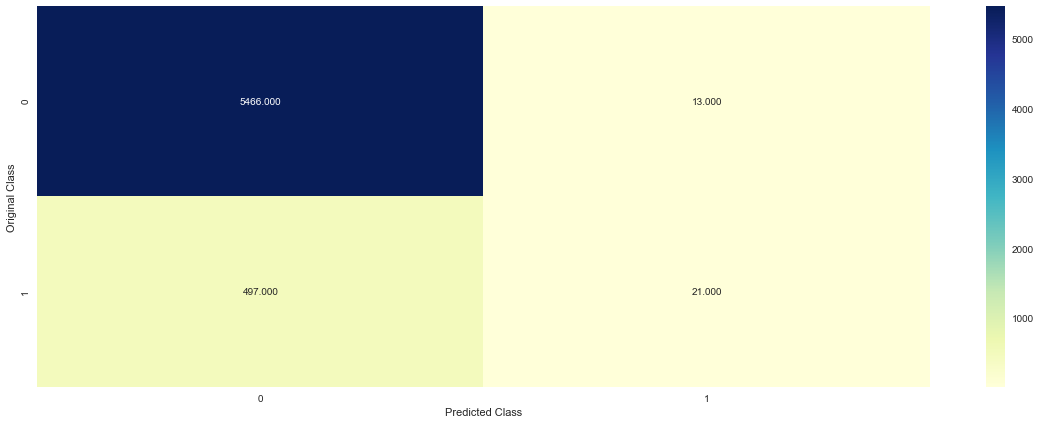

-------------------- Precision matrix (Columm Sum=1) --------------------


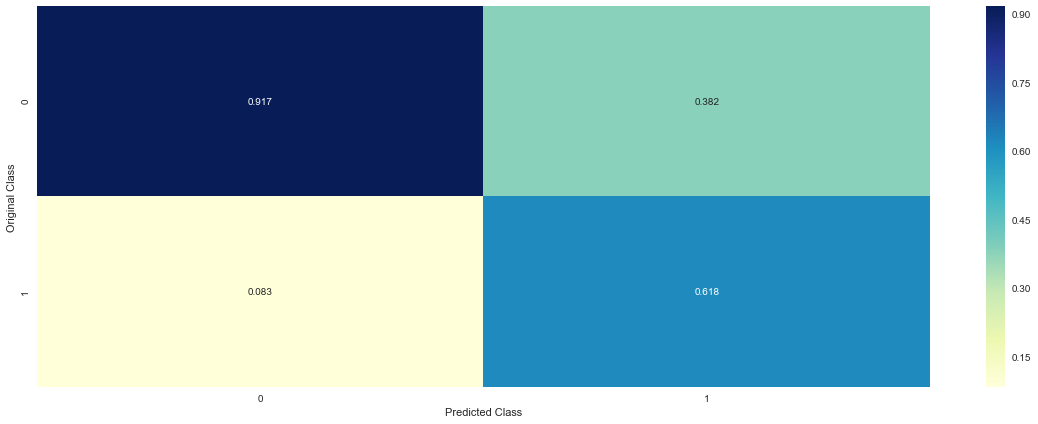

-------------------- Recall matrix (Row sum=1) --------------------


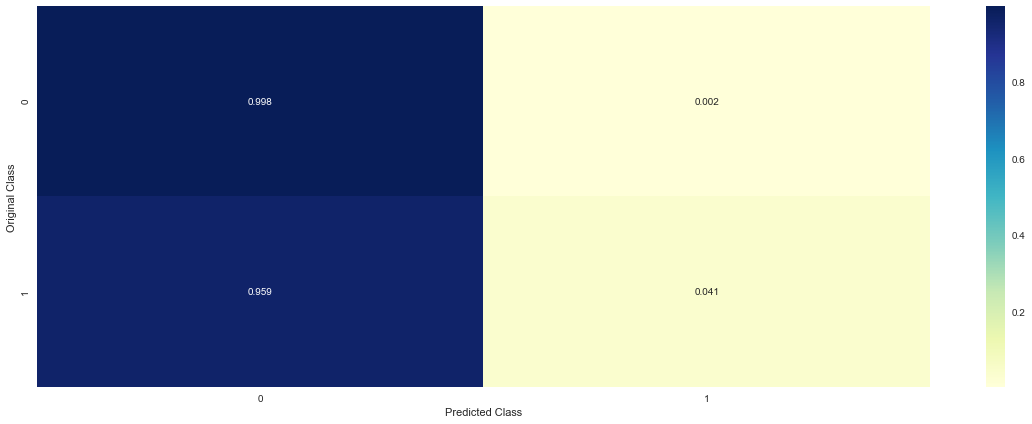

In [116]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2)], voting='soft')
vclf.fit(train_df, y_train)
print("Log loss (train) on the VotingClassifier :", log_loss(y_train, vclf.predict_proba(train_df)))
print("Log loss (CV) on the VotingClassifier :", log_loss(y_cv, vclf.predict_proba(cv_df)))
print("Log loss (test) on the VotingClassifier :", log_loss(y_test, vclf.predict_proba(test_df)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_df)- y_test))/y_test.shape[0])
plot_confusion_matrix(test_y=y_test, predict_y=vclf.predict(test_df))

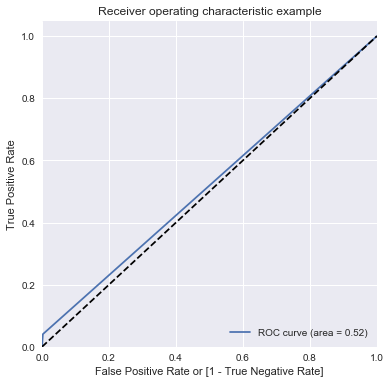

Accuracy =     0.915
Sensitivity =     0.041
Specificity  =     0.998
Precision =     0.618
Recall (TPR) =  0.041
Fallout  = 0.002
AUC = 0.519
------------------------------------------------
Confusion Matrix
[[5466   13]
 [ 497   21]]
------------------------------------------------
              precision    recall  f1-score   support

   not_churn       0.92      1.00      0.96      5479
       churn       0.62      0.04      0.08       518

   micro avg       0.91      0.91      0.91      5997
   macro avg       0.77      0.52      0.52      5997
weighted avg       0.89      0.91      0.88      5997

------------------------------------------------


In [117]:
test_evaluation_score(y_test,test_df,vclf)

## Naive Bayes

<h4> Hyper parameter tuning</h4>

In [118]:
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [119]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_df_nb = scaler.fit_transform(train_df)
test_df_nb = scaler.transform(test_df)
cv_df_nb = scaler.transform(cv_df)

for alpha = 1e-05
Log Loss : 0.2510634009480812
for alpha = 0.0001
Log Loss : 0.25106341983383523
for alpha = 0.001
Log Loss : 0.2510636087109608
for alpha = 0.1
Log Loss : 0.2510846021835214
for alpha = 1
Log Loss : 0.2512949979636394
for alpha = 10
Log Loss : 0.255012556307041
for alpha = 100
Log Loss : 0.2897725045169385
for alpha = 1000
Log Loss : 0.29266474908465456


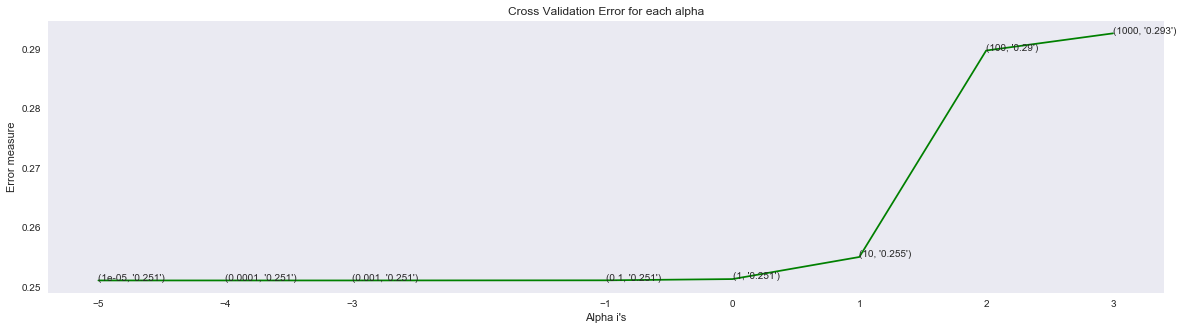

For values of best alpha =  1e-05 The train log loss is: 0.25540675807975666
For values of best alpha =  1e-05 The cross validation log loss is: 0.2510634009480812
For values of best alpha =  1e-05 The test log loss is: 0.25221424261102193


In [120]:
# http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_df_nb, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_df_nb, y_train)
    sig_clf_probs = sig_clf.predict_proba(cv_df_nb)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 
    
fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_df_nb, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df_nb, y_train)


predict_y = sig_clf.predict_proba(train_df_nb)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_df_nb)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_df_nb)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

Log Loss : 0.2510634009480812
Number of missclassified point : 0.08670279283034597
-------------------- Confusion matrix --------------------


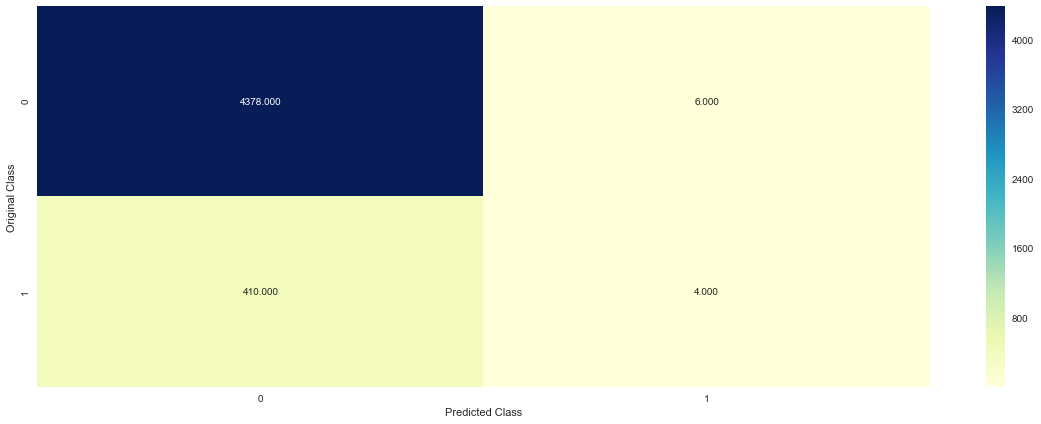

-------------------- Precision matrix (Columm Sum=1) --------------------


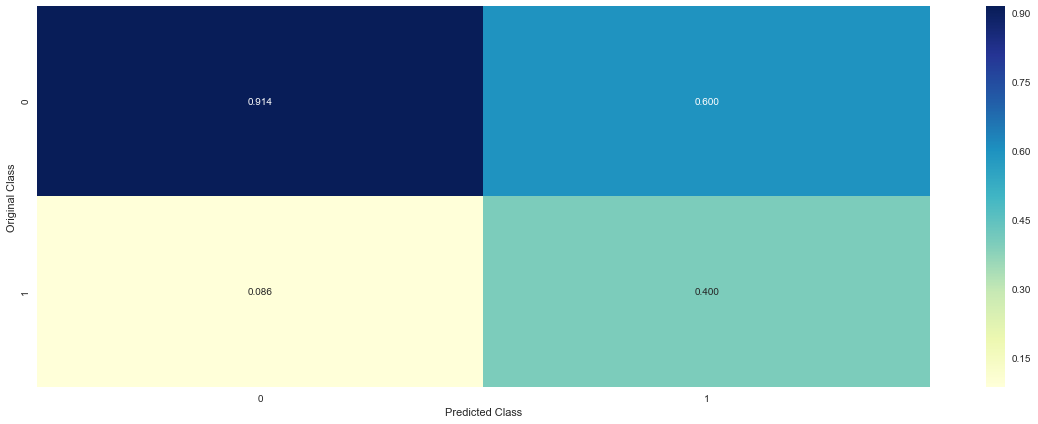

-------------------- Recall matrix (Row sum=1) --------------------


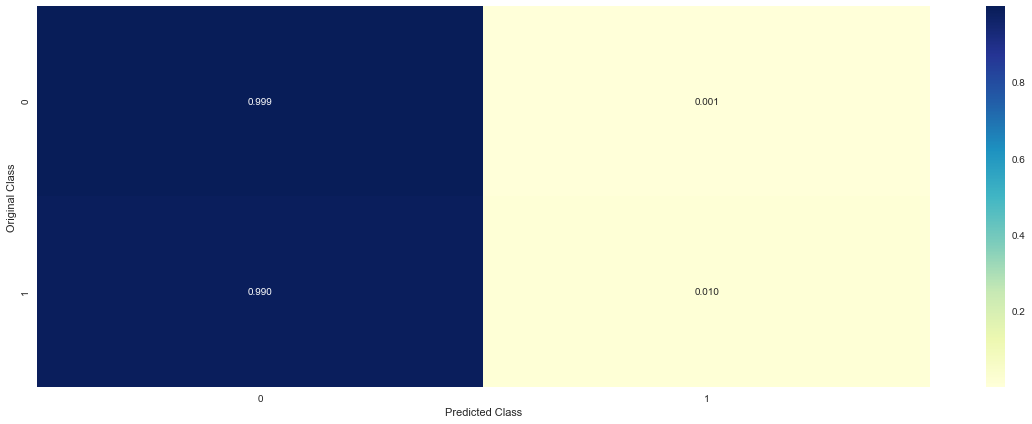

In [121]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.



# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_df_nb, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_df_nb, y_train)
sig_clf_probs = sig_clf.predict_proba(cv_df_nb)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(y_cv, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_df_nb)- y_cv))/y_cv.shape[0])
plot_confusion_matrix(y_cv, sig_clf.predict(cv_df_nb))

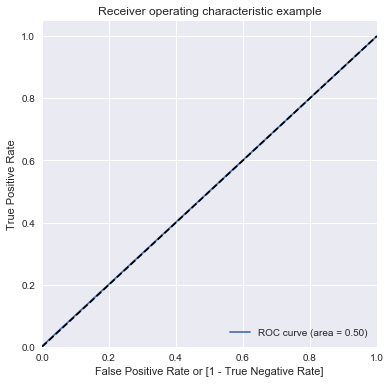

Accuracy =     0.914
Sensitivity =     0.002
Specificity  =     1.000
Precision =     1.000
Recall (TPR) =  0.002
Fallout  = 0.000
AUC = 0.501
------------------------------------------------
Confusion Matrix
[[5479    0]
 [ 517    1]]
------------------------------------------------
              precision    recall  f1-score   support

   not_churn       0.91      1.00      0.95      5479
       churn       1.00      0.00      0.00       518

   micro avg       0.91      0.91      0.91      5997
   macro avg       0.96      0.50      0.48      5997
weighted avg       0.92      0.91      0.87      5997

------------------------------------------------


In [122]:
test_evaluation_score(y_test,test_df,clf)

# Second Model for finding best columns

## Recursive Feature Elimination

In [123]:
from sklearn.feature_selection import RFECV

In [124]:
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(train_imp, y_train)

RFECV(cv=10,
   estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring='accuracy', step=1,
   verbose=0)

In [125]:
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

Optimal number of features: 25
Selected features: ['onnet_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_action_phase', 'std_og_t2t_mou_7', 'og_others_action_phase', 'total_og_mou_6', 'total_og_mou_action_phase', 'loc_ic_t2m_mou_action_phase', 'loc_ic_mou_action_phase', 'std_ic_t2m_mou_7', 'std_ic_mou_action_phase', 'total_ic_mou_7', 'total_ic_mou_action_phase', 'spl_ic_mou_action_phase', 'total_rech_num_action_phase', 'total_rech_amt_6', 'last_day_rch_amt_action_phase', 'monthly_2g_action_phase', 'monthly_3g_action_phase', 'fb_user_action_phase', 'aon', 'loc_og_t2t_mou_good_phase', 'std_og_mou_good_phase', 'loc_ic_t2m_mou_good_phase', 'std_ic_mou_good_phase']


 We have a total of 25 featurs selected by the RFE. The 25 important featurs are as below:
 
 'onnet_mou_7', 'roam_og_mou_7', 'loc_og_t2t_mou_action_phase', 'std_og_t2t_mou_7', 'og_others_action_phase', 'total_og_mou_6', 'total_og_mou_action_phase', 'loc_ic_t2m_mou_action_phase', 'loc_ic_mou_action_phase', 'std_ic_t2m_mou_7', 'std_ic_mou_action_phase', 'total_ic_mou_7', 'total_ic_mou_action_phase', 'spl_ic_mou_action_phase', 'total_rech_num_action_phase', 'total_rech_amt_6', 'last_day_rch_amt_action_phase', 'monthly_2g_action_phase', 'monthly_3g_action_phase', 'fb_user_action_phase', 'aon', 'loc_og_t2t_mou_good_phase', 'std_og_mou_good_phase', 'loc_ic_t2m_mou_good_phase', 'std_ic_mou_good_phase'

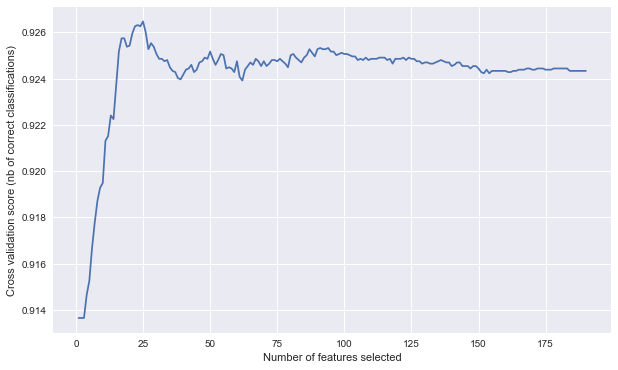

In [126]:
# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

<br><br>                                                                  <h1>   Conclusion   </h1>   <br>

We have used range of Regression Models to find the best fit for the given data. We observed that the given data is significantly imbalanced with only 8% of the Churns. <br>
Therefore, to compare and maximize the prediction, we ran the models with both balanced and imbalanced model. <br>

We ran below models: <ber>

<b>1- Random Model <br>

2- Logistic Regression <br>

3- Linear Support Vector Machines <br>

4- Random Forest <br>

5- K Nearest Neighbour Classification <br>

6- XgBoost Classifier without hyper param tuning <br>

7- Maximum voting Classifier <br>

8- Naive Bayes <br> </b>

Keeping the business objective(to predict the churns) in mind, we need to make sure that the potential churns are predicted correctly. <br>
Therefore, sensitivity or recall is the most important model evaluation parameter in this regression problem. <br>
Other model evaluation parameters that we will compare are: Log loss, Accuracy, Specificity, and AUC. <br> <br>

<b>

       Model Name                        Train Log Loss           Cross Validation Log loss  Test Log Loss           Accuracy         Sensitivity           AUC  
  
  </b>
     
      Logistic Reg Blanacing                  0.22                          0.22                 0.21                  0.82                0.83              0.80
  
      Logistic w/o Reg Blanacing              0.22                          0.22                 0.22                  0.92                0.36              0.67
      
      Linear Support Vector Machine           0.21                          0.22                 0.21                  0.79                0.83              0.80   
      
      Random Forest classifier                0.12                          0.21                 0.20                  0.91                0.10              0.55
      
      K nearest Neighbour Classification      0.21                          0.22                 0.21                  0.92                0.10              0.55
      
      XGBoost                                 0.09                          0.22                 0.22                  0.92                0.21              0.56
      
      Stack the model                         0.22                          0.22                 0.22                  0.91                0.18              0.58
      
      Maximum voting classifier               0.22                          0.22                 0.22                  0.91                0.18              0.58
      
      Naive Bayes                             0.24                          0.24                 0.24                  0.91                0.002             0.50
      
      
      
      
  <br> <br>
  
  
  The above table contains values of different Model evaluation parameters: Train Log Loss, Cross Validation Log loss, Test Log Loss, Accuracy, Sensitivity, and AUC. 

Cross Validation log loss and Test log loss for all the Models is more or less same. Therefore, Sensitivity, Accuracy, and AUC are the main parameters that we will use for Model evaluation. 

Logistic Regression, Random Forest, and XGboost are the Model with the highest accuracy. 

We primarily need to be able to predict the customer churn. Predicting a not-churning customer a churn would not hurt the business as much as not predicting a potential churn does. 

Therefore, the Sensitivity is more important than the accuracy for the problem in hand. We need to choose a Model with high sensitivity and a right balance of other parameters. 

Logistic Regression and Support Vector machine Models result in the best sensitivity. But SVM performs poorly in terms accuracy and AUC. 


<h4>

Logistic Regression is the Model with the highest Sensitivity and a right balance of Accuracy and UC measures. </h4>


We have a total of 25 features selected by the RFE to be the most important features in deciding the customer churn. The selected features are as below:  <br>
 

 1. onnet_mou_7,<br> 2. roam_og_mou_7, <br>3. loc_og_t2t_mou_action_phase, <br>4. std_og_t2t_mou_7, <br>5. og_others_action_phase, <br>6. total_og_mou_6, <br>7. total_og_mou_action_phase, <br>8. loc_ic_t2m_mou_action_phase, <br>9. loc_ic_mou_action_phase, <br>10. std_ic_t2m_mou_7,<br> 11. std_ic_mou_action_phase,<br> 12. total_ic_mou_7, <br>13. total_ic_mou_action_phase, <br>14. spl_ic_mou_action_phase, <br>15. total_rech_num_action_phase,<br> 16. total_rech_amt_6, <br>17. last_day_rch_amt_action_phase, <br>18. monthly_2g_action_phase, <br>19. monthly_3g_action_phase, <br>20. fb_user_action_phase, <br> 21. aon, <br> 22. loc_og_t2t_mou_good_phase, <br> 23. std_og_mou_good_phase, <br>24. loc_ic_t2m_mou_good_phase, <br> 25. std_ic_mou_good_phase
 
 